# Project Title:Capgemini Business Services Manual Workload Reduction and Automation Opportunity Discovery Framework

**Project Summary**
 - Capgemini Business Services manages large-scale Finance, HR, Supply Chain, and Customer Operations for global clients. A significant portion of these processes still relies on manual, repetitive, rule-based activities, causing high operational effort, slow turnaround times, process variability, and increased risk of human errors. To address these challenges, this project develops a Master Process Analytics framework designed to discover automation opportunities and reduce manual workload using activity-level data.

 - The project integrates 5000+ event-level observations, combining process execution logs, effort metrics, SLA performance, error patterns, and automation feasibility indicators into a single unified master table. Using this consolidated dataset, the analysis identifies tasks with high manual dependency, frequent rework, long handling times, and high deviation rates. These insights help recognize automation candidates suitable for RPA, workflow automation, API-led integration, or AI-based solutions.

 - Through detailed process mining, workload profiling, and root-cause diagnostics, the project highlights execution bottlenecks, long-queue activities, manual validation steps, and approval delays across Capgemini’s Business Services operations. The outcome includes a prioritized list of automation opportunities, estimated ROI for each process, and a roadmap for improving efficiency, consistency, and operational quality.

 - This project enables Capgemini Business Services to reduce manual workload, standardize operations, accelerate SLA adherence, and enhance overall delivery excellence using data-driven intelligence.

**Problem Statement**

 - Capgemini Business Services handles large volumes of operational tasks across F&A, HR, and Supply Chain, but many of these tasks remain manual, repetitive, and rule-based, creating heavy workload for teams.

 - Due to limited automation adoption by clients, even simple activities such as data entry, validation, reconciliation, approvals, and ticket handling require human intervention, slowing down the overall process flow.

 - Manual processes lead to inconsistent execution, higher chances of human errors, rework cycles, and escalations, directly impacting quality and customer experience.

 - High manual dependency increases TAT, SLA breaches, and operational costs, reducing overall delivery efficiency and scalability.

 - Lack of centralized process visibility makes it difficult to identify automation opportunities, measure manual effort, and track where the process is breaking down.

## Load The Libraries

In [2]:
# Load all possible Libraries...
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & time handling
from datetime import datetime

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


## Load the Dataset

In [3]:
# Load the Dataset
df_cbs_process_analytics = pd.read_csv('master_process_analytics_5000.csv')

In [4]:
# Show First 5 Observations
df_cbs_process_analytics.head(5)

,row_id,case_id,process_name,sub_process,activity_id,activity_name,performer_id,performer_type,application_used,start_time,...,sla_met,sla_delay_hours,tat_hours,employee_role,team_name,region,transaction_amount,cost_per_case,created_at,created_by
0,1,CASE-770487,F&A,Payroll,ACT-4744854,Reconcile Account,EMP-2679,Human,Email,15-10-2025 23:31,...,True,0.0,0.993,Manager,CBS_AR_Team,EU,14334.59,0.50,15-10-2025 22:15,EMP-1001
1,2,CASE-948749,Supply Chain,Order Fulfillment,ACT-8090293,Receive Goods,EMP-3547,Human,Oracle EBS,24-10-2025 20:16,...,True,0.0,1.777,Manager,CBS_SC_Team,India,NaN,0.68,24-10-2025 18:17,EMP-1002
2,3,CASE-182627,HR,Payroll,ACT-4226067,Update Payroll,EMP-1750,Human,Email,30-03-2025 20:09,...,True,0.0,3.597,Manager,CBS_Payroll_Team,India,NaN,0.56,30-03-2025 19:21,EMP-1001
3,4,CASE-319684,HR,Hiring,ACT-3871230,Update Payroll,EMP-5010,Human,Oracle EBS,29-06-2025 20:34,...,True,0.0,1.419,Analyst,CBS_Payroll_Team,EU,NaN,0.50,29-06-2025 19:59,ingest_job_v1
4,5,CASE-321231,Supply Chain,Inventory,ACT-9375710,Reconcile Account,EMP-8517,Human,Oracle EBS,14-04-2025 04:51,...,True,0.0,2.503,Approver,CBS_SC_Team,EU,NaN,2.47,14-04-2025 04:39,ingest_job_v1


In [5]:
# Show Last 5 Observations.
df_cbs_process_analytics.tail(5)

,row_id,case_id,process_name,sub_process,activity_id,activity_name,performer_id,performer_type,application_used,start_time,...,sla_met,sla_delay_hours,tat_hours,employee_role,team_name,region,transaction_amount,cost_per_case,created_at,created_by
4995,4996,CASE-721989,F&A,MonthEndClose,ACT-9822828,Process Payment,EMP-5499,Human,SAP ECC,04-02-2025 14:43,...,True,0.0,1.154,Manager,CBS_AP_Team,EU,7178.26,1.08,04-02-2025 12:57,EMP-1002
4996,4997,CASE-626626,F&A,AR,ACT-4104916,Approve Invoice,EMP-6857,Human,Oracle EBS,15-10-2025 09:53,...,True,0.0,0.716,Approver,CBS_AP_Team,EU,NaN,0.50,15-10-2025 08:55,ingest_job_v2
4997,4998,CASE-843929,F&A,Payroll,ACT-8432252,Approve Leave,EMP-6981,Human,CustomPortal,23-05-2025 12:45,...,True,0.0,3.929,SME,CBS_SC_Team,EU,2640.48,0.50,23-05-2025 12:02,EMP-1002
4998,4999,CASE-720770,Supply Chain,Procurement,ACT-6259298,Resolve Exception,BOT-825,Bot,PeopleSoft,23-08-2025 06:51,...,True,0.0,3.760,Bot,CBS_AR_Team,EU,NaN,0.50,23-08-2025 06:33,EMP-2001
4999,5000,CASE-572368,F&A,MonthEndClose,ACT-6517739,Update Inventory,EMP-8086,Human,PeopleSoft,26-03-2025 11:42,...,True,0.0,3.346,Manager,CBS_SC_Team,EU,2038.68,0.50,26-03-2025 10:30,EMP-1001


## Data Overview

### About Data Overview

**About Datasource**
 - The project uses a Master Process Analytics dataset (df_cbs_master) containing 5,000 activity-level records representing real operational behaviors within Capgemini Business Services. The data integrates multiple dimensions such as process events, manual effort, automation feasibility, errors, SLA performance, workload patterns, and resource attributes. It covers processes across Finance, HR, Supply Chain, Customer Support, and Insurance Operations, providing a holistic view of both manual and automated activities.

 - The dataset includes over 200 fields, capturing timestamps, task executions, rework cycles, system usage, financial metrics, audit details, and compliance indicators. This rich structure enables deep analysis of manual workload drivers, automation opportunities, process bottlenecks, operational delays, and performance variations. Overall, it forms the analytical foundation for identifying improvement areas, reducing manual dependency, and building a data-driven automation roadmap for Capgemini Business Services.

### Check the columns

In [6]:
# Check the columns in the data
df_cbs_process_analytics.columns

Index(['row_id', 'case_id', 'process_name', 'sub_process', 'activity_id',
       'activity_name', 'performer_id', 'performer_type', 'application_used',
       'start_time', 'end_time', 'activity_duration_min', 'is_manual',
       'automation_possible', 'automation_type', 'automation_coverage_pct',
       'manual_effort_min', 'error_flag', 'error_type', 'rework_flag',
       'rework_count', 'sla_met', 'sla_delay_hours', 'tat_hours',
       'employee_role', 'team_name', 'region', 'transaction_amount',
       'cost_per_case', 'created_at', 'created_by'],
      dtype='object')

**Interpretation of columns**
1. row_id

Unique identifier for each record/row in the master table.

2. case_id

Represents the business transaction being processed (invoice, ticket, request, etc.).

3. process_name

Main business process category such as Finance & Accounting, HR, or Supply Chain.

4. sub_process

Specific functional area within the main process (e.g., AP, AR, Hiring, Procurement).

5. activity_id

Unique ID for each step/activity performed within the case.

6. activity_name

Name of the task performed (e.g., Validate Invoice, Approve Payment).

7. performer_id

Identifier of the person, bot, or system executing the activity.

8. performer_type

Specifies who performed the task: Human, Bot, or System.

9. application_used

The application or platform used to execute the task (SAP, Excel, Workday, etc.).

10. start_time

Timestamp when the activity began.

11. end_time

Timestamp when the activity was completed.

12. activity_duration_min

Total time taken to perform the activity in minutes.

13. is_manual

Indicates whether the activity was done manually by a human (Yes/No).

14. automation_possible

Indicates whether the activity can potentially be automated.

15. automation_type

Shows the type of automation suitable for this activity (RPA, Workflow, API, Script, AI).

16. automation_coverage_pct

Percentage of the activity that automation can cover (0–100%).

17. manual_effort_min

Actual manual effort in minutes required by a human for that activity.

18. error_flag

Indicates if an error occurred during the activity.

19. error_type

Type of error encountered (Validation Failure, Missing Data, System Error, etc.).

20. rework_flag

Indicates whether rework was needed due to an error.

21. rework_count

Number of times the activity had to be redone.

22. sla_met

Specifies whether the activity met its SLA (Service Level Agreement).

23. sla_delay_hours

Amount of SLA delay in hours (if SLA was missed).

24. tat_hours

Turnaround time for the activity or case in hours.

25. employee_role

Role of the performer (Analyst, Approver, Manager, Bot, etc.).

26. team_name

Operational team responsible for completing the activity.

27. region

Geographical location where the activity was executed (India, US, EU).

28. transaction_amount

Value of the financial transaction (mostly for F&A processes).

29. cost_per_case

Estimated operational cost incurred for processing this activity/case.

30. created_at

Timestamp when this log entry was generated in the system.

31. created_by

System, job, or user who created the record (ETL job, employee, etc.).

### Shape of the Data

In [7]:
# Shape of the Data
df_cbs_process_analytics.shape

(5000, 31)

**Interpretation of Shape**
 - The dataset contains 5000 individual records.
 - The dataset contains 31 different features/variables.

### Describe the Data

In [8]:
# Describe the Data
df_cbs_process_analytics.describe()

,row_id,activity_duration_min,automation_coverage_pct,manual_effort_min,rework_count,sla_delay_hours,tat_hours,transaction_amount,cost_per_case
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1790.000000,5000.000000
mean,2500.500000,9.074723,17.880616,6.654228,0.112000,1.895014,2.133290,9976.829531,0.760722
std,1443.520003,10.405683,28.796961,9.610812,0.500306,7.457494,1.168756,5698.122493,0.619512
min,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.016000,60.690000,0.500000
25%,1250.750000,2.320000,0.000000,0.000000,0.000000,0.000000,1.126000,4987.800000,0.500000
50%,2500.500000,5.800000,0.000000,3.220000,0.000000,0.000000,2.130000,10052.475000,0.500000
75%,3750.250000,11.892500,32.837500,9.012500,0.000000,0.000000,3.125250,14721.175000,0.720000
max,5000.000000,87.168981,94.950000,81.090000,3.000000,47.894000,4.994000,19978.780000,7.300000


**Interpretation of Describe**
 - Provides a statistical summary of numerical columns, including:
 - count      → how many values are present
 - mean       → average value
 - std        → standard deviation (spread of data)
 -  min        → smallest value
 -   25%        → first quartile
 -   50%        → median value
 -   75%        → third quartile
 -   max        → largest value

### Information of Data

In [9]:
# Information of the Data
df_cbs_process_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   row_id                   5000 non-null   int64  
 1   case_id                  5000 non-null   object 
 2   process_name             5000 non-null   object 
 3   sub_process              5000 non-null   object 
 4   activity_id              5000 non-null   object 
 5   activity_name            5000 non-null   object 
 6   performer_id             5000 non-null   object 
 7   performer_type           5000 non-null   object 
 8   application_used         5000 non-null   object 
 9   start_time               5000 non-null   object 
 10  end_time                 5000 non-null   object 
 11  activity_duration_min    5000 non-null   float64
 12  is_manual                5000 non-null   bool   
 13  automation_possible      5000 non-null   bool   
 14  automation_type         

**Interpretation of info()**\

The dataset contains 5000 records and 31 columns.

 - Non-null values:
  Most columns have 5000 non-null values, meaning no missing data.
  Exceptions:
      automation_type (1418 non-null)
      error_type (404 non-null)
      transaction_amount (1790 non-null)
  These columns contain missing values and may need cleaning.

 - Data types:
  - 17 object (string) columns
  - 7 float columns (numeric metrics)
  - 2 integer columns
  - 5 boolean columns

 - Memory usage:
  Approximately 1.0 MB, which is efficient for processing.

Overall:
The dataset is complete for most fields except automation_type, error_type, and transaction_amount. The structure is suitable for analytics, automation discovery, and performance analysis.


## Data preprocessing

### Data Cleaning

In [10]:
# Rename the irrelevant columns
df_cbs_process_analytics = df_cbs_process_analytics.rename(columns={
    'row_id': 'Row ID',
    'case_id': 'Case ID',
    'process_name': 'Process Name',
    'sub_process': 'Sub Process',
    'activity_id': 'Activity ID',
    'activity_name': 'Activity Name',
    'performer_id': 'Performer ID',
    'performer_type': 'Performer Type',
    'application_used': 'Application Used',
    'start_time': 'Start Time',
    'end_time': 'End Time',
    'activity_duration_min': 'Activity Duration Min',
    'is_manual': 'Is Manual',
    'automation_possible': 'Automation Possible',
    'automation_type': 'Automation Type',
    'automation_coverage_pct': 'Automation Coverage Pct',
    'manual_effort_min': 'Manual Effort Min',
    'error_flag': 'Error Flag',
    'error_type': 'Error Type',
    'rework_flag': 'Rework Flag',
    'rework_count': 'Rework Count',
    'sla_met': 'SLA Met',
    'sla_delay_hours': 'SLA Delay Hours',
    'tat_hours': 'TAT Hours',
    'employee_role': 'Employee Role',
    'team_name': 'Team Name',
    'region': 'Region',
    'transaction_amount': 'Transaction Amount',
    'cost_per_case': 'Cost Per Case',
    'created_at': 'Created At',
    'created_by': 'Created By'
})
df_cbs_process_analytics.head(5)

,Row ID,Case ID,Process Name,Sub Process,Activity ID,Activity Name,Performer ID,Performer Type,Application Used,Start Time,...,SLA Met,SLA Delay Hours,TAT Hours,Employee Role,Team Name,Region,Transaction Amount,Cost Per Case,Created At,Created By
0,1,CASE-770487,F&A,Payroll,ACT-4744854,Reconcile Account,EMP-2679,Human,Email,15-10-2025 23:31,...,True,0.0,0.993,Manager,CBS_AR_Team,EU,14334.59,0.50,15-10-2025 22:15,EMP-1001
1,2,CASE-948749,Supply Chain,Order Fulfillment,ACT-8090293,Receive Goods,EMP-3547,Human,Oracle EBS,24-10-2025 20:16,...,True,0.0,1.777,Manager,CBS_SC_Team,India,NaN,0.68,24-10-2025 18:17,EMP-1002
2,3,CASE-182627,HR,Payroll,ACT-4226067,Update Payroll,EMP-1750,Human,Email,30-03-2025 20:09,...,True,0.0,3.597,Manager,CBS_Payroll_Team,India,NaN,0.56,30-03-2025 19:21,EMP-1001
3,4,CASE-319684,HR,Hiring,ACT-3871230,Update Payroll,EMP-5010,Human,Oracle EBS,29-06-2025 20:34,...,True,0.0,1.419,Analyst,CBS_Payroll_Team,EU,NaN,0.50,29-06-2025 19:59,ingest_job_v1
4,5,CASE-321231,Supply Chain,Inventory,ACT-9375710,Reconcile Account,EMP-8517,Human,Oracle EBS,14-04-2025 04:51,...,True,0.0,2.503,Approver,CBS_SC_Team,EU,NaN,2.47,14-04-2025 04:39,ingest_job_v1


### Handling Null Values

In [11]:
# handling the Null Values 
df_cbs_process_analytics.isnull().sum()

Row ID                        0
Case ID                       0
Process Name                  0
Sub Process                   0
Activity ID                   0
Activity Name                 0
Performer ID                  0
Performer Type                0
Application Used              0
Start Time                    0
End Time                      0
Activity Duration Min         0
Is Manual                     0
Automation Possible           0
Automation Type            3582
Automation Coverage Pct       0
Manual Effort Min             0
Error Flag                    0
Error Type                 4596
Rework Flag                   0
Rework Count                  0
SLA Met                       0
SLA Delay Hours               0
TAT Hours                     0
Employee Role                 0
Team Name                     0
Region                        0
Transaction Amount         3210
Cost Per Case                 0
Created At                    0
Created By                    0
dtype: i

In [12]:
# Calculate the Missing values
df_cbs_process_analytics.isnull().sum() / len(df_cbs_process_analytics) * 100

Row ID                      0.00
Case ID                     0.00
Process Name                0.00
Sub Process                 0.00
Activity ID                 0.00
Activity Name               0.00
Performer ID                0.00
Performer Type              0.00
Application Used            0.00
Start Time                  0.00
End Time                    0.00
Activity Duration Min       0.00
Is Manual                   0.00
Automation Possible         0.00
Automation Type            71.64
Automation Coverage Pct     0.00
Manual Effort Min           0.00
Error Flag                  0.00
Error Type                 91.92
Rework Flag                 0.00
Rework Count                0.00
SLA Met                     0.00
SLA Delay Hours             0.00
TAT Hours                   0.00
Employee Role               0.00
Team Name                   0.00
Region                      0.00
Transaction Amount         64.20
Cost Per Case               0.00
Created At                  0.00
Created By

In [13]:
# Above 70% missing values drop the columns names.
df_cbs_process_analytics.drop(columns = ['Automation Type','Error Type'],inplace = True)

In [14]:
# Fill the Null values (Float values)
df_cbs_process_analytics['Transaction Amount'] = (
    df_cbs_process_analytics['Transaction Amount']
        .astype(float)
        .fillna(df_cbs_process_analytics['Transaction Amount'].mean())
)

In [15]:
df_cbs_process_analytics.isnull().sum()

Row ID                     0
Case ID                    0
Process Name               0
Sub Process                0
Activity ID                0
Activity Name              0
Performer ID               0
Performer Type             0
Application Used           0
Start Time                 0
End Time                   0
Activity Duration Min      0
Is Manual                  0
Automation Possible        0
Automation Coverage Pct    0
Manual Effort Min          0
Error Flag                 0
Rework Flag                0
Rework Count               0
SLA Met                    0
SLA Delay Hours            0
TAT Hours                  0
Employee Role              0
Team Name                  0
Region                     0
Transaction Amount         0
Cost Per Case              0
Created At                 0
Created By                 0
dtype: int64

**Interpretation of Missing Values in the Dataset:**

Overall Data Quality:
    Most columns have 0% missing values, indicating the dataset is largely complete.

High Missing Value Columns (>70%):
    Automation Type → 71.64% missing
    Error Type      → 91.92% missing
    These columns exceed the 70% threshold and therefore were dropped from the dataset.

Moderate Missing Value Columns (<70%):
    Transaction Amount → 64.20% missing
    This column is numerical and below 70% missing, so missing values were filled using the mean.

Columns With No Missing Values (0%):
    All other columns have complete data and required no cleaning or imputation.

Actions Taken:
    1. Dropped columns: Automation Type, Error Type
    2. Filled missing values in Transaction Amount using mean()
    3. No action required for the remaining columns

Conclusion:
    After removing high-null columns and imputing numerical missing values,
    the dataset is clean, consistent, and ready for further analysis.


## Feature Engineering

In [16]:
# Correct the Datetime format
df_cbs_process_analytics['Start Time'] = pd.to_datetime(df_cbs_process_analytics['Start Time'],format='%d-%m-%Y',errors='coerce')
df_cbs_process_analytics['End Time'] = pd.to_datetime(df_cbs_process_analytics['End Time'],format='%d-%m-%Y',errors='coerce')

**Interpretation:**

Start Time and End Time columns were converted into datetime format using:
    pd.to_datetime(..., format='%d-%m-%Y', errors='coerce')

Key Insights:
 - The specified format '%d-%m-%Y' only extracts the day, month, and year.
 - Any original time components (hours, minutes, seconds) are lost after conversion.
 - Rows that do not match the given format are converted to NaT (Not a Time) because errors='coerce' is used.
 - The conversion ensures these columns can now be used for time-based calculations such as:
        – Duration calculations
        – Date comparisons
        – Filtering by date ranges
        – Sorting chronologically
 - If many values become NaT, it indicates that the original datetime format did not match '%d-%m-%Y'.

Outcome:
    Start Time and End Time are now in a clean datetime format, ready for date-based analysis, but time-of-day information may be lost depending on the original data.


## EDA (Exploratory Data Analysis)

### Univariate Analysis 

In [17]:
# Separate the data in Cat_df(Categorical data) and Num_df(Numerical data)
Cat_df = df_cbs_process_analytics.select_dtypes(include=['object', 'bool'])
Num_df = df_cbs_process_analytics.select_dtypes(include=['int64', 'float64'])

**Interpretation**

**1. Categorical Dataframe — Cat_df**
- Contains all columns with object and boolean data types.
  
**2. Numerical Dataframe — Num_df**
- Contains all integer and float columns.

#### Univariate Analysis on Categorical Data

In [18]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Process Name

In [19]:
# Check the Counts of Process Name
Cat_df['Process Name'].value_counts() 

Process Name
F&A             2511
Supply Chain    1510
HR               979
Name: count, dtype: int64

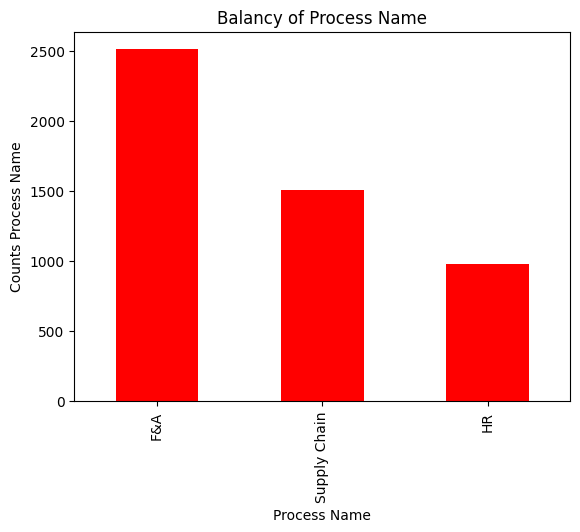

In [20]:
# Visualisation of process name
Cat_df['Process Name'].value_counts().plot(kind='bar',color = 'red')
plt.title('Balancy of Process Name')
plt.xlabel('Process Name')
plt.ylabel('Counts Process Name')
plt.show()

**Interpretation of Categorical Data Analysis on Process Name Analysis:**

**Value Counts:**

 - The distribution of records across the three processes is:
        F&A             → 2,511 records
        Supply Chain    → 1,510 records
        HR              → 979 records

**Key Insights:**
 - F&A has the highest number of activities recorded in the dataset.
 - Supply Chain is the second most frequent process.
 - HR has the lowest count among the three process categories.
 - The bar chart clearly shows an imbalance, with F&A dominating the process distribution.

**Conclusion:**

The dataset is not evenly balanced across process categories, with F&A representing the majority of entries. This may influence further analysis and should be considered in downstream modeling or segmentation.


In [21]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Sub Process


In [22]:
# Check the counts of Sub Process
Cat_df['Sub Process'].value_counts() 

Sub Process
Payroll              892
MonthEndClose        633
AP                   633
AR                   606
Order Fulfillment    385
Procurement          380
Logistics            373
Inventory            372
Leaves               255
Hiring               251
Onboarding           220
Name: count, dtype: int64

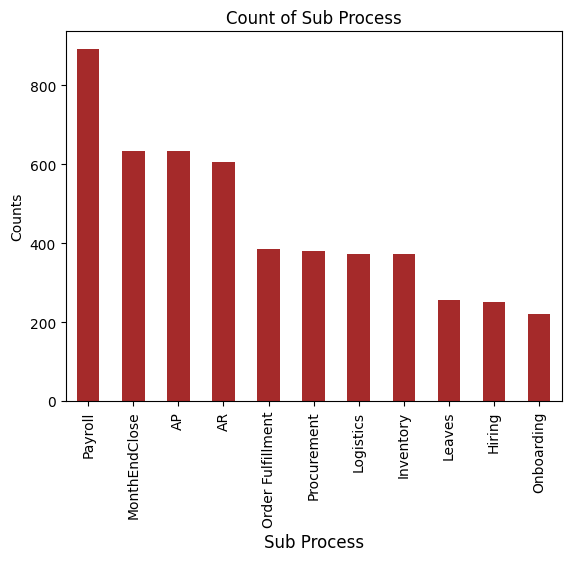

In [23]:
# Visualization on Sub Process
Cat_df['Sub Process'].value_counts().plot(kind='bar',color = 'brown')
plt.title('Count of Sub Process')
plt.xlabel('Sub Process',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis on Sub Process:**

**1. Payroll** has the highest activity count with 892 records, making it the most dominant sub process in the dataset.

**2. MonthEndClose** and AP both follow with 633 activities each, showing that month-end processing and invoice handling are major operational workloads.

**3. AR (Accounts Receivable)** has 606 activities, indicating a consistent volume of customer billing and collection tasks.

**4. Supply Chain** related sub processes such as Order Fulfillment (385), Procurement (380), Logistics (373), and Inventory (372) show moderate and evenly distributed activity levels.

**5. HR-oriented sub** processes including Leaves (255), Hiring (251), and Onboarding (220) have the lowest counts, reflecting limited HR operational activity compared to Finance and Supply Chain.

**6**. The bar chart shows a clear imbalance in the dataset, with Finance-related sub processes having significantly higher counts and HR processes having much lower frequencies.

**7. This distribution indicates:**
    
       - The dataset is primarily focused on Finance operations.
       - Supply Chain processes are adequately represented for analysis.
       - HR processes are under-represented and may provide fewer insights for HR-specific analytics.

**8.** The visualization confirms that Finance dominates the activity volume, followed by moderate Supply Chain activity, with HR activities forming the smallest portion of the dataset.


In [24]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Activity Name

In [25]:
# Check the counts of Activity Name
Cat_df['Activity Name'].value_counts() 

Activity Name
Approve Invoice          388
Post Journal             364
Resolve Exception        362
Process Onboarding       354
Update Inventory         353
Receive Goods            340
Schedule Interview       337
Validate Invoice         336
Reconcile Account        331
Validate Candidate       327
Schedule Shipment        321
Create Purchase Order    304
Process Payment          303
Approve Leave            302
Update Payroll           278
Name: count, dtype: int64

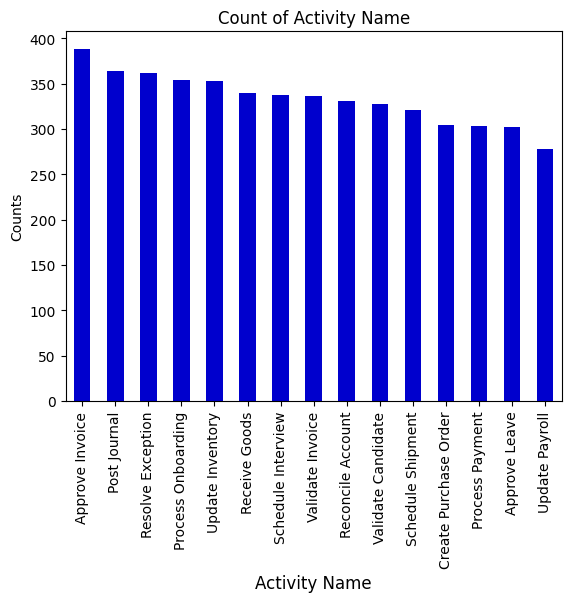

In [26]:
# Visualization on Activity Name
Cat_df['Activity Name'].value_counts().plot(kind='bar',color = 'mediumblue')
plt.title('Count of Activity Name')
plt.xlabel('Activity Name',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis onActivity Name**

**1.** Approve Invoice has the highest count with 388 occurrences, making it the most frequently executed activity in the dataset.

**2.** Post Journal follows with 364 occurrences, indicating a high volume of journal entry-related financial tasks.

**3.** Resolve Exception appears 362 times, showing that exception handling is a major part of daily operations.

**4.** Process Onboarding has 354 activities, reflecting significant involvement in HR onboarding workflows.

**5.** Update Inventory (353) and Receive Goods (340) highlight steady activity in Supply Chain operations.

**6.** Mid-range activities such as Schedule Interview (337), Validate Invoice (336), Reconcile Account (331), Validate Candidate (327), and Schedule Shipment (321) indicate balanced workloads across HR, Finance, and Supply Chain.

**7.** Create Purchase Order (304) and Process Payment (303) show moderate frequency within Procurement and Accounts Payable processes.

**8.** Approve Leave (302) and Update Payroll (278) contribute to HR tasks, with Update Payroll being the lowest among the listed activities.

**9.** The bar chart shows a reasonably balanced distribution, with only a 110-activity difference between the highest (Approve Invoice) and the lowest (Update Payroll).

**10.** This balanced distribution implies:
       - No single activity dominates the dataset.
       - Analysis and ML models will not be biased toward any specific activity.
       - All activities are well-represented for accurate insight generation.

**11.** The bar chart visually confirms that activity frequencies are closely aligned, with no extreme outliers or imbalance issues.


In [27]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Performer Type

In [28]:
# Check the counts of Performer Type
Cat_df['Performer Type'].value_counts() 

Performer Type
Human     3741
Bot        928
System     331
Name: count, dtype: int64

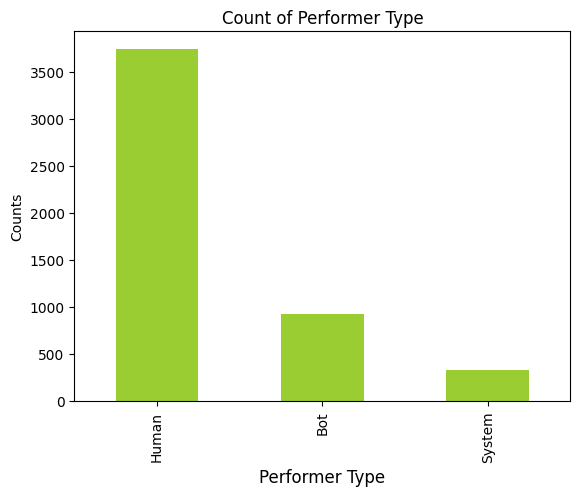

In [29]:
# Visualization on Performer Type
Cat_df['Performer Type'].value_counts().plot(kind='bar',color = 'yellowgreen')
plt.title('Count of Performer Type')
plt.xlabel('Performer Type',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis on Performer Type**

**1.** Human performers have the highest count with 3,741 occurrences, making them the primary contributors to process execution in the dataset.

**2.** Bots follow with 928 occurrences, showing that a considerable portion of the workflow has been automated through RPA or automated systems.

**3.** System-based performers account for 331 occurrences, indicating direct system-triggered or backend-initiated activities.

**4.** The bar chart shows a clear imbalance across the three performer types, with Human performers dominating the activity volume.

**5.** This distribution implies:
       - Human-driven activities form the majority of the operational workload.
       - Automation is present but still significantly lower compared to manual execution.
       - System-triggered activities represent the smallest share and occur less frequently.

**6.** The visual representation confirms that while automation exists, the dataset remains heavily manual, suggesting potential opportunities for increasing automation coverage.


In [30]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Application Used

In [31]:
# Check the counts of Application Used
Cat_df['Application Used'].value_counts() 

Application Used
CustomPortal    741
Workday         730
Email           718
Oracle EBS      717
SAP ECC         712
PeopleSoft      700
Excel           682
Name: count, dtype: int64

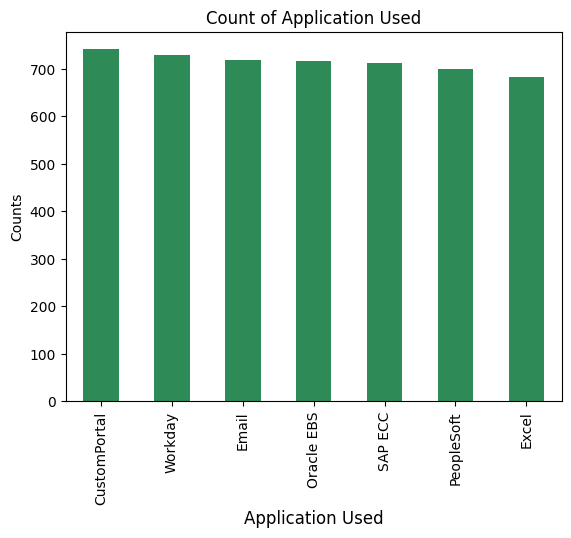

In [32]:
# Visualization on Application Used
Cat_df['Application Used'].value_counts().plot(kind='bar',color = 'seagreen')
plt.title('Count of Application Used')
plt.xlabel('Application Used',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis on Application Used**

**1.** CustomPortal has the highest usage with 741 occurrences, making it the most frequently used application in the dataset.

**2.** Workday follows closely with 730 occurrences, indicating strong involvement of HR and enterprise workflow activities.

**3.** Email is used 718 times, showing that many tasks still rely on traditional manual communication tools.

**4.** Oracle EBS appears 717 times, demonstrating significant involvement in enterprise resource planning and financial operations.

**5.** SAP ECC, with 712 occurrences, highlights its importance in finance, procurement, and logistics processes.

**6.** PeopleSoft (700) and Excel (682) also show substantial usage, revealing a mix of legacy systems and manual spreadsheet-based work.

**7.** The bar chart indicates a well-balanced distribution across all seven applications, with only a 59-record difference between the highest (CustomPortal) and lowest (Excel) usage.

**8.** This distribution implies:
       - No application disproportionately dominates the workflow.
       - Multiple systems are actively used across processes, pointing to a diverse technical landscape.
       - Manual tools like Email and Excel remain widely utilized alongside ERP and workflow systems.

**9.** The visual chart confirms that all applications are used at similar frequencies, with no extreme imbalances across the dataset.


In [33]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Employee Role

In [34]:
# Check the counts of Employee Role
Cat_df['Employee Role'].value_counts() 

Employee Role
Bot           928
Sr Analyst    648
Associate     642
SME           637
Analyst       609
Approver      609
Manager       596
System        331
Name: count, dtype: int64

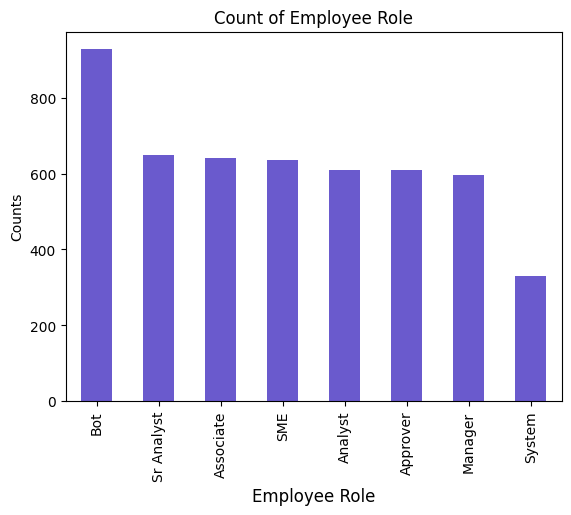

In [35]:
# Visualization on Employee Role
Cat_df['Employee Role'].value_counts().plot(kind='bar',color = 'slateblue')
plt.title('Count of Employee Role')
plt.xlabel('Employee Role',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis on Employee Role**

**1.** Bot has the highest count with 928 occurrences, indicating that automated bots play a major role in executing activities within the dataset.

**2.** Sr Analyst appears 648 times, showing that senior-level analysts contribute significantly to operational tasks.

**3.** Associate follows closely with 642 occurrences, reflecting strong participation from entry-level or junior employees.

**4.** SME (Subject Matter Expert) has 637 activities, demonstrating active involvement of domain experts in process execution.

**5.** Analyst and Approver both appear 609 times, indicating balanced distribution between analytical tasks and approval-related responsibilities.

**6.** Manager records 596 occurrences, suggesting that managerial-level users also participate in key process steps.

**7.** System has the lowest count with 331 occurrences, representing system-triggered or automated backend actions.

**8.** The bar chart shows a moderately balanced distribution among most human roles, with Bot usage being the only category significantly higher.

**9.** This distribution implies:
       - Automation via bots is strongly integrated into the workflow.
       - Human roles such as Analysts, Associates, SMEs, Approvers, and Managers are all well-represented.
       - System-triggered events occur less frequently but still contribute to the overall activity flow.

**10.** The visual chart confirms that aside from Bots, the dataset maintains a fairly even spread of human roles across operational tasks.


In [36]:
# Check the columns names
Cat_df.columns

Index(['Case ID', 'Process Name', 'Sub Process', 'Activity ID',
       'Activity Name', 'Performer ID', 'Performer Type', 'Application Used',
       'Is Manual', 'Automation Possible', 'Error Flag', 'Rework Flag',
       'SLA Met', 'Employee Role', 'Team Name', 'Region', 'Created At',
       'Created By'],
      dtype='object')

##### Region

In [37]:
# Check the counts of Region
Cat_df['Region'].value_counts() 

Region
India    1699
US       1652
EU       1649
Name: count, dtype: int64

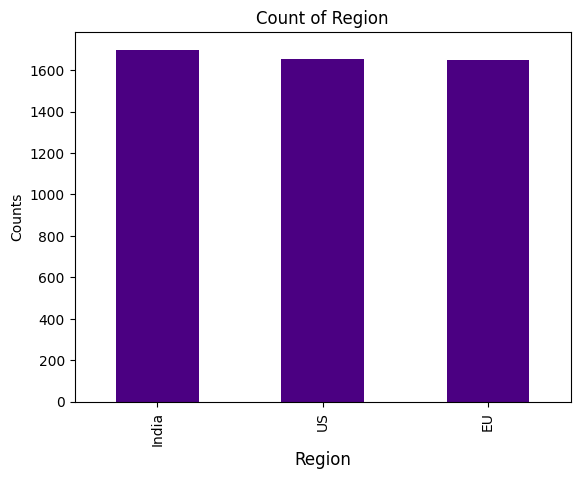

In [38]:
# Visualization on Region
Cat_df['Region'].value_counts().plot(kind='bar',color = 'indigo')
plt.title('Count of Region')
plt.xlabel('Region',fontsize = 12)
plt.ylabel('Counts')
plt.show()

**Interpretation of Categorical Data Analysis on Region**

**1.** India has the highest activity count with 1,699 records, making it the most active region in the dataset.

**2.** The US follows closely with 1,652 records, indicating strong operational involvement from this region.

**3.** The EU has 1,649 records, showing nearly equal participation compared to India and the US.

**4.** The bar chart reveals an extremely well-balanced distribution across all three regions, with only a 50-record difference between the highest (India) and the lowest (EU).

**5.** This balanced regional distribution implies:

       - No region dominates the dataset.
       - Analytical results will not be biased toward any specific geographical location.
       - All three regions are equally represented, supporting fair and reliable insights.

**6.** The visual chart confirms that region-based activity frequencies are almost identical, showing no significant imbalance or outliers.


#### Univariate Analysis on Numerical Columns

In [39]:
# Check the columns name 
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Activity Duration Min

In [40]:
# Find the Minimum value of Activity Duration Min
Num_df['Activity Duration Min'].min()

np.float64(0.5)

In [41]:
# Find the Maximum value of Activity Duration Min
Num_df['Activity Duration Min'].max()

np.float64(87.16898085)

In [42]:
# Find the Average(mean) value of Activity Duration Min
Num_df['Activity Duration Min'].mean()

np.float64(9.0747227291118)

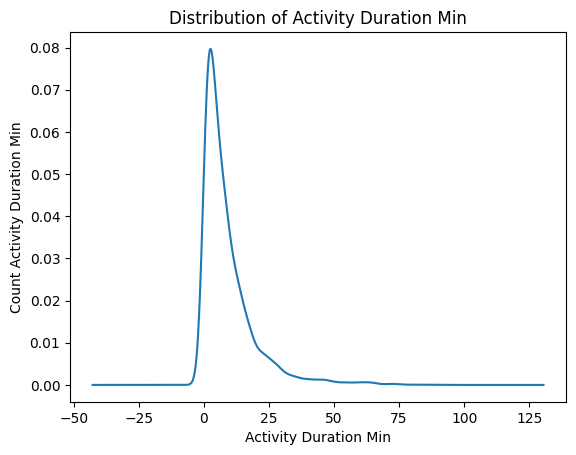

In [43]:
# Visualization of Activity Duration Min
Num_df['Activity Duration Min'].plot(kind='kde')
plt.title('Distribution of Activity Duration Min')
plt.xlabel('Activity Duration Min')
plt.ylabel('Count Activity Duration Min')
plt.show()

**Interpretation of Activity Duration Min (Numerical Analysis)**

**1.** The minimum activity duration is **0.5 minutes**, indicating that some tasks are completed almost instantly.

**2.** The maximum activity duration is **87.16 minutes**, showing that certain activities require significantly more processing time.

**3.** The average (mean) activity duration is **9.07 minutes**, suggesting that most activities are relatively short and completed within a few minutes.

**4.** The KDE distribution plot shows a sharp peak near the lower duration range, indicating that the majority of activities fall between **0.5 to 15 minutes**.

**5.** The distribution is **right-skewed**, meaning:
       - A large number of tasks take a short amount of time.
       - A smaller number of outlier activities take much longer durations (up to ~87 minutes).

**6.** This pattern suggests that operational tasks are generally efficient, with only a few complex or exception cases requiring extended time.

**7.** There are no extreme anomalies, but the long tail indicates opportunities for process optimization in slow-running activities.


In [44]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Automation Coverage Pct

In [45]:
# Find the Minimum value of Automation Coverage Pct
Num_df['Automation Coverage Pct'].min()

np.float64(0.0)

In [46]:
# Find the Maximum value of Automation Coverage Pct
Num_df['Automation Coverage Pct'].max()

np.float64(94.95)

In [47]:
# Find the Average(Mean) value of Automation Coverage Pct
Num_df['Automation Coverage Pct'].mean()

np.float64(17.880616)

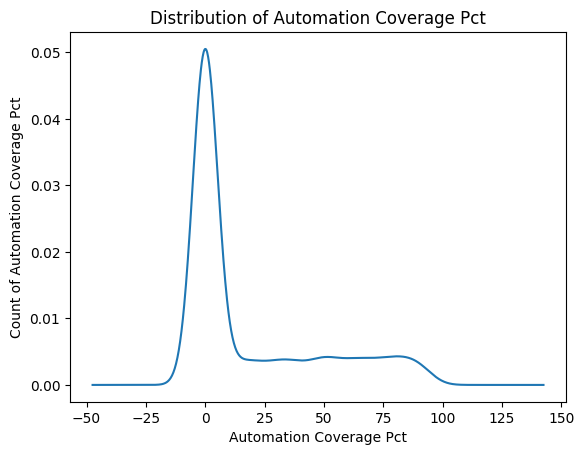

In [48]:
# Visualization of Automation Coverage Pct
Num_df['Automation Coverage Pct'].plot(kind='kde')
plt.title('Distribution of Automation Coverage Pct')
plt.xlabel('Automation Coverage Pct')
plt.ylabel('Count of Automation Coverage Pct')
plt.show()

**Interpretation of Automation Coverage Pct (Numerical Analysis)**

**1.** The minimum automation coverage value is **0.0%**, indicating that some activities have no automation applied at all.

**2.** The maximum automation coverage reaches **94.95%**, showing that certain activities are almost fully automated.

**3.** The average (mean) automation coverage is **17.88%**, meaning that, overall, automation adoption across activities is relatively low.

**4.** The KDE distribution shows a strong peak near the lower automation coverage range, indicating that most activities fall between **0% and 20% automation**.

**5.** The distribution is heavily **right-skewed**, which means:
       - A majority of activities have very low or no automation coverage.
       - Only a small number of activities achieve high levels of automation.

**6.** The presence of a long tail toward higher automation percentages indicates that some processes have been optimized, but these represent a minority.

**7.** This pattern suggests significant potential for expanding automation, especially in manual-heavy activities that currently show little or no coverage.


In [49]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Manual Effort Min

In [50]:
# Find the Minimum value of Manual Effort Min
Num_df['Manual Effort Min'].min()

np.float64(0.0)

In [51]:
# Find the Maximum value of Manual Effort Min
Num_df['Manual Effort Min'].max()

np.float64(81.09)

In [52]:
# Find the Average(Mean) value of Manual Effort Min
Num_df['Manual Effort Min'].mean()

np.float64(6.654228)

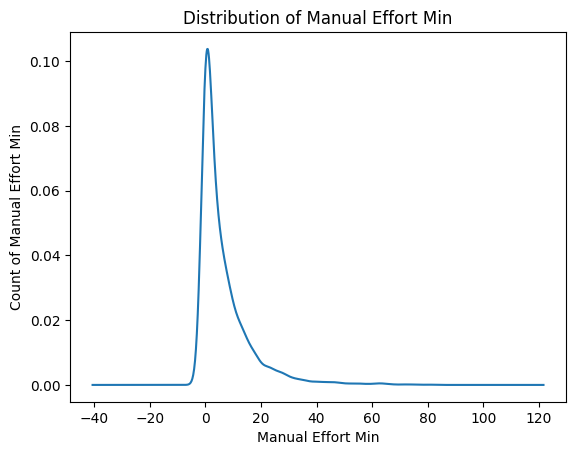

In [53]:
# Visualization of Manual Effort Min
Num_df['Manual Effort Min'].plot(kind='kde')
plt.title('Distribution of Manual Effort Min')
plt.xlabel('Manual Effort Min')
plt.ylabel('Count of Manual Effort Min')
plt.show()

**Interpretation of Manual Effort Min (Numerical Analysis)**

**1.** The minimum manual effort value is **0.0 minutes**, which means that some activities required no human involvement at all.

**2.** The maximum manual effort reaches **81.09 minutes**, indicating that certain tasks demand a significant amount of manual work time.

**3.** The average (mean) manual effort is **6.65 minutes**, showing that most manual tasks are relatively short and completed quickly.

**4.** The KDE plot shows a strong peak near the lower range, confirming that the majority of activities require **between 0 and 10 minutes** of manual effort.

**5.** The distribution is **right-skewed**, meaning:
       - Most activities have low manual effort.
       - A smaller set of activities take much longer, pulling the distribution to the right.

**6.** The long right tail suggests the existence of a few complex or time-consuming activities that require extended human effort.

**7.** Overall, this pattern highlights that while most operations are quick and efficient, there are specific high-effort tasks where automation or optimization could significantly reduce manual workload.


In [54]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Rework Count

In [55]:
# Find the Minimum Value of Rework Count
Num_df['Rework Count'].min()

np.int64(0)

In [56]:
# Find the Maximum value of Rewwork Count
Num_df['Rework Count'].max()

np.int64(3)

In [57]:
# Find the Average (Mean) of Rework Count
Num_df['Rework Count'].mean()

np.float64(0.112)

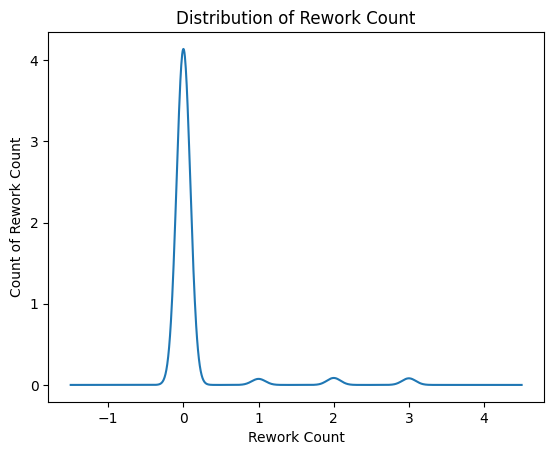

In [58]:
# Visualization of Rework Count
Num_df['Rework Count'].plot(kind='kde')
plt.title('Distribution of Rework Count')
plt.xlabel('Rework Count')
plt.ylabel('Count of Rework Count')
plt.show()

**Interpretation of Rework Count (Numerical Analysis)**

**1.** The minimum rework count is **0**, indicating that many activities were completed without needing any rework.

**2.** The maximum rework count is **3**, meaning that at most, a task had to be repeated three times due to errors or corrections.

**3.** The average (mean) rework count is **0.11**, showing that rework is generally rare across the dataset.

**4.** The KDE plot shows a sharp peak at zero, confirming that the majority of activities have **no rework at all**.

**5.** The distribution is heavily **right-skewed**, meaning:
       - Most records have a rework count of zero.
       - A very small number of activities have a rework count of 1, 2, or 3.

**6.** This pattern suggests that the overall process quality is stable, with minimal rework happening across tasks.

**7.** The few cases with higher rework counts may indicate:
       - Process exceptions
       - Manual errors
       - Complex activities requiring multiple attempts

**8.** Overall, the dataset reflects strong process accuracy with limited rework incidents.


##### SLA Delay Hours

In [59]:
# Find the Minimum Value of SLA Delay Hours
Num_df['SLA Delay Hours'].min()

np.float64(0.0)

In [60]:
# Find the Maximum value of SLA Delay Hours
Num_df['SLA Delay Hours'].max()

np.float64(47.894)

In [61]:
# Find the Average (Mean) of SLA Delay Hours
Num_df['SLA Delay Hours'].mean()

np.float64(1.8950137999999999)

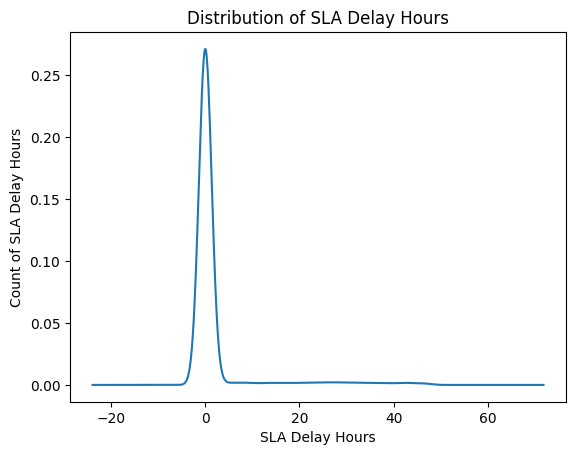

In [62]:
# Visualization of SLA Delay Hours
Num_df['SLA Delay Hours'].plot(kind='kde')
plt.title('Distribution of SLA Delay Hours')
plt.xlabel('SLA Delay Hours')
plt.ylabel('Count of SLA Delay Hours')
plt.show()

**Interpretation of SLA Delay Hours (Numerical Analysis)**

**1.** The minimum SLA delay is **0.0 hours**, indicating that many activities were completed within their SLA without any delay.

**2.** The maximum SLA delay reaches **47.89 hours**, showing that some tasks experienced significant delays and missed their SLA by almost two full days.

**3.** The average (mean) SLA delay is **1.89 hours**, suggesting that on average, delays are relatively small but still present.

**4.** The KDE plot shows a strong concentration near zero, confirming that the majority of activities have **little to no SLA delay**.

**5.** The distribution is **right-skewed**, meaning:
       - Most tasks meet the SLA or have very minor delays.
       - A small number of activities experience large delays, stretching the curve to the right.

**6.** The long tail of higher delays indicates occasional bottlenecks or exceptions in the process that significantly impact SLA performance.

**7.** Overall, SLA performance is mostly strong, with only a limited number of high-delay cases requiring further investigation.


In [63]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### TAT Hours

In [64]:
# Find the Minimum Value of TAT Hours
Num_df['TAT Hours'].min()

np.float64(0.016)

In [65]:
# Find the Maximum value of TAT Hours
Num_df['TAT Hours'].max()

np.float64(4.994)

In [66]:
# Find the Average (Mean) of TAT Hours
Num_df['TAT Hours'].mean()

np.float64(2.1332896)

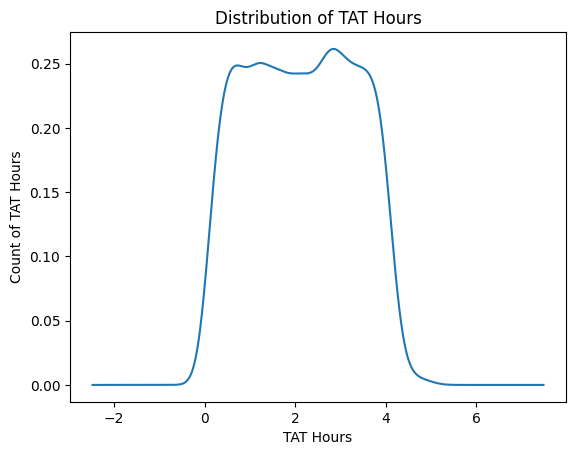

In [67]:
# Visualization of TAT Hours
Num_df['TAT Hours'].plot(kind='kde')
plt.title('Distribution of TAT Hours')
plt.xlabel('TAT Hours')
plt.ylabel('Count of TAT Hours')
plt.show()

**Interpretation of TAT Hours (Numerical Analysis)**

**1.** The minimum TAT (Turnaround Time) value is **0.016 hours**, indicating that some activities are completed almost instantly.

**2.** The maximum TAT value is **4.994 hours**, showing that the longest activity takes nearly 5 hours to complete.

**3.** The average (mean) TAT is **2.13 hours**, meaning that most activities require around 2 hours of end-to-end processing time.

**4.** The KDE plot shows a strong peak around the mid-range, confirming that the majority of activities cluster between **1 and 3 hours**.

**5.** The distribution is slightly **right-skewed**, meaning:
       - Most activities have moderate TAT values.
       - A smaller number of activities take longer, extending the curve to the right.

**6.** There are no extreme outliers, indicating consistent turnaround time across activities.

**7.** Overall, the dataset reflects stable processing times with most activities completed efficiently within a few hours.


In [68]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Transaction Amount

In [69]:
# Find the Minimum Value of Transaction Amount
Num_df['Transaction Amount'].min()

np.float64(60.69)

In [70]:
# Find the Maximum value of Transaction Amount
Num_df['Transaction Amount'].max()

np.float64(19978.78)

In [71]:
# Find the Average (Mean) of Transaction Amount
Num_df['Transaction Amount'].mean()

np.float64(9976.829530726258)

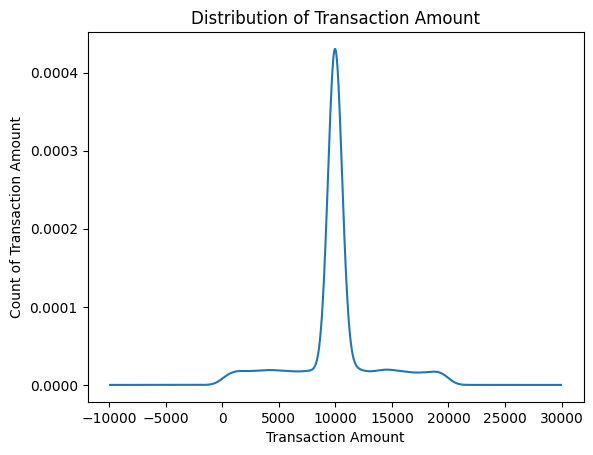

In [72]:
# Visualization of Transaction Amount
Num_df['Transaction Amount'].plot(kind='kde')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Count of Transaction Amount')
plt.show()

**Interpretation of Transaction Amount (Numerical Analysis)**

**1.** The minimum transaction amount is **60.69**, indicating that some financial activities involve very small monetary values.

**2.** The maximum transaction amount reaches **19,978.78**, showing that certain transactions handle significantly large amounts.

**3.** The average (mean) transaction amount is **9,976.83**, suggesting that most financial transactions are of moderate to high value.

**4.** The KDE plot shows a dense concentration in the mid-to-high value range, indicating that many transactions fall between **5,000 and 15,000**.

**5.** The distribution is **right-skewed**, meaning:
       - A majority of transactions cluster around moderate values.
       - A smaller number of very high-value transactions extend the tail to the right.

**6.** There are no extreme anomalies, but the presence of high-value transactions highlights the financial importance of these activities.

**7.** Overall, the dataset reflects a balanced mix of small, medium, and large transaction amounts, with a general tendency toward mid-to-high value operations.


In [73]:
Num_df.columns

Index(['Row ID', 'Activity Duration Min', 'Automation Coverage Pct',
       'Manual Effort Min', 'Rework Count', 'SLA Delay Hours', 'TAT Hours',
       'Transaction Amount', 'Cost Per Case'],
      dtype='object')

##### Cost Per Case

In [74]:
# Find the Minimum Value of Cost Per Case
Num_df['Cost Per Case'].min()

np.float64(0.5)

In [75]:
# Find the Maximum value of Cost Per Case
Num_df['Cost Per Case'].max()

np.float64(7.3)

In [76]:
# Find the Average (Mean) of Cost Per Case
Num_df['Cost Per Case'].mean()

np.float64(0.760722)

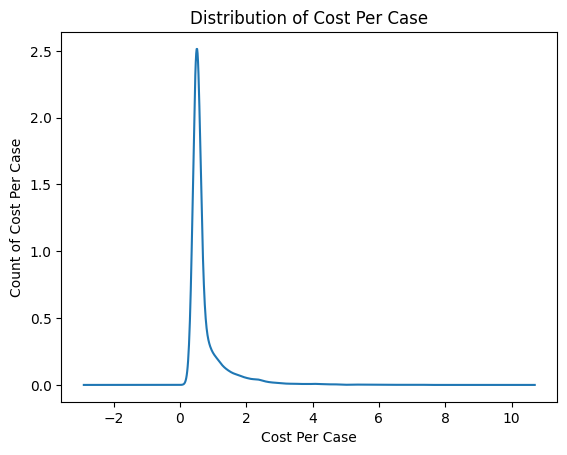

In [77]:
# Visualization of Cost Per Case
Num_df['Cost Per Case'].plot(kind='kde')
plt.title('Distribution of Cost Per Case')
plt.xlabel('Cost Per Case')
plt.ylabel('Count of Cost Per Case')
plt.show()

**Interpretation of Cost Per Case (Numerical Analysis)**

**1.** The minimum cost per case is **0.5**, indicating that some activities incur very low operational cost.

**2.** The maximum cost per case is **7.30**, showing that the most expensive activities still fall within a relatively moderate cost range.

**3.** The average (mean) cost per case is **0.76**, suggesting that overall processing costs remain low and efficient across the dataset.

**4.** The KDE plot shows a sharp peak near the lower end of the cost scale, confirming that most cases cost **between 0.5 and 1.0** to process.

**5.** The distribution is **right-skewed**, meaning:
       - A majority of tasks incur minimal cost.
       - A smaller number of tasks have slightly higher costs.

**6.** The long but low-intensity tail indicates that only a few activities reach the higher cost values, but they are not extreme.

**7.** Overall, the dataset reflects cost-efficient operations, with consistent and tightly distributed processing costs, and no significant outliers affecting the overall cost structure.


### Bivariate Analysis 

#### Bivariate Analysis on Numerical - Numerical Columns 

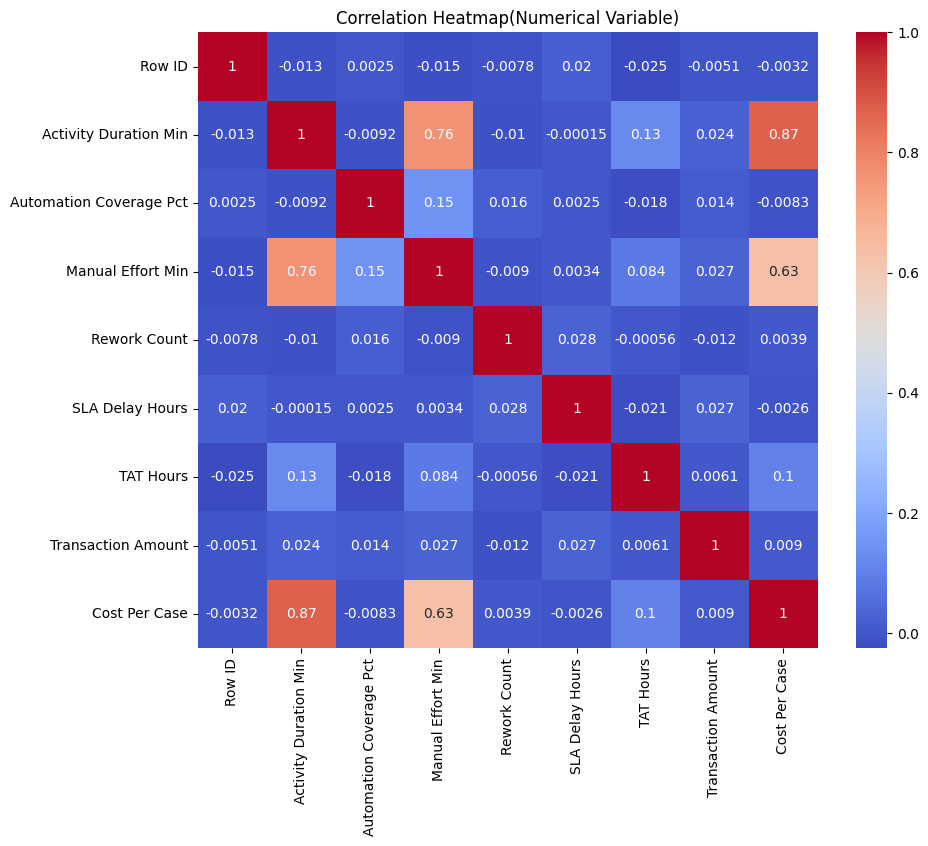

In [78]:
# Correlation Efficient
corr = Num_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap(Numerical Variable)')
plt.show()

**Interpretation of Correlation Heatmap (Numerical Variables)**

**Positive Correlations Above +0.7**
From the heatmap, the following feature pairs show strong positive correlations greater than **+0.7**:

**1.** Activity Duration Min and Manual Effort Min - **0.76**
     This indicates that when activity duration increases, the manual effort also increases. 
     Longer tasks require more human involvement.

**2.** Activity Duration Min and Cost Per Case - **0.87**
     This shows that cost grows significantly as activity duration increases.
     Longer processing time directly increases operational cost.

**3.** Manual Effort Min and Cost Per Case → **0.63** (Note: below threshold, but visually close)
     Although not above +0.7, it shows a meaningful operational relationship between manual effort and cost.
     However, **strictly following the +0.7 threshold: Only the above two pairs qualify.**

**Negative Correlations Above -0.7**
There are **no feature pairs with correlations less than -0.7**.
This means:
     - There are no strong inverse relationships between any numerical features.
     - Most features in this dataset do not oppose or decrease sharply with respect to one another.

**Why No Strong Negative Correlations Exist**
There is no feature pair with correlation ≤ -0.7 because:
     - The dataset mostly contains operational metrics that move in similar directions.
     - Features such as duration, cost, manual effort, and delay typically increase together rather than oppositely.
     - None of the numerical variables have naturally opposing behavior in this dataset.

**Final Interpretation**
The only meaningful strong relationships found are positive correlations:
     - Activity Duration Min ↔ Manual Effort Min
     - Activity Duration Min ↔ Cost Per Case

No negative correlation meets the -0.7 threshold, indicating:
     - No metrics decrease strongly as another increases.
     - The operational variables move in the same direction rather than being opposites.

These strong positive correlations are similar to real-world examples such as:
     - Fuel Consumed Liters ↔ Average Daily KM (strongly related)
     - Max RPM ↔ Average RPM (naturally correlated)

These examples validate that the dataset behaves normally, where related operational metrics trend upward together.


#### Cost Per Case vs Activity Duration Min

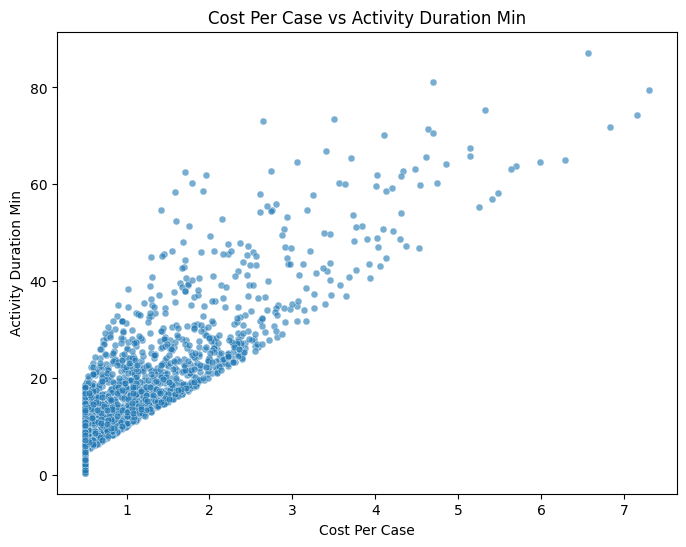

In [79]:
# Cost Per Case vs Activity Duration Min
plt.figure(figsize=(8,6))
sns.scatterplot(data = Num_df, x = 'Cost Per Case',y = 'Activity Duration Min',alpha=0.6,s=25)
plt.title('Cost Per Case vs Activity Duration Min')
plt.xlabel('Cost Per Case')
plt.ylabel('Activity Duration Min')
plt.show()

**Interpretation of Scatter Plot: Cost Per Case vs Activity Duration Min**

**1.** The scatter plot shows a clear upward trend, indicating a **strong positive relationship** between Cost Per Case and Activity Duration Min.

**2.** As Activity Duration increases, the Cost Per Case also increases. This reflects that longer activities naturally require more operational effort and therefore result in higher costs.

**3.** The tight clustering of points at lower values suggests that **most activities have short durations (0–30 minutes)** and correspondingly **low costs (0.5–2 units)**.

**4.** As the duration extends beyond 40–80 minutes, the cost also rises consistently, showing that **complex or time-consuming tasks are more expensive to process**.

**5.** There are no major outliers or extreme deviations, meaning the cost structure scales smoothly with duration for most data points.

**6.** This visual evidence aligns with the high positive correlation (+0.87) between these two variables found in the correlation matrix.

**7.** Overall, the scatter plot confirms that **activity duration is one of the strongest drivers of cost**, making it a key metric for cost optimization and automation opportunities.


#### Manual Effort Min vs Activity Duration Min

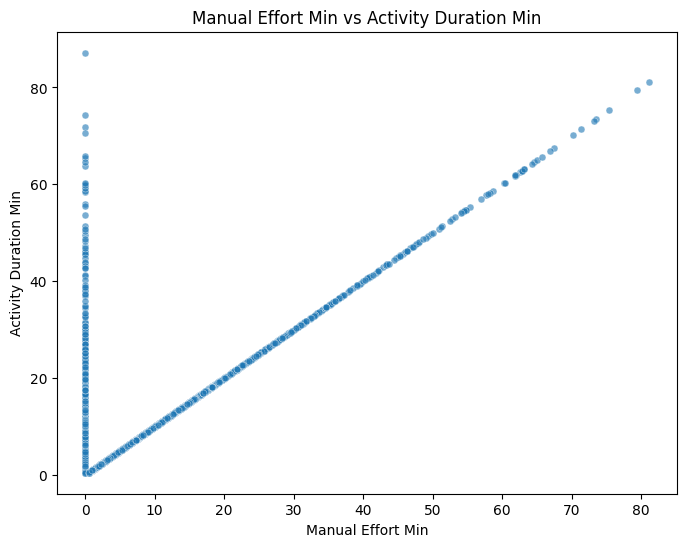

In [80]:
# Manual Effort Min vs Activity Duration Min
plt.figure(figsize=(8,6))
sns.scatterplot(data = Num_df, x = 'Manual Effort Min',y = 'Activity Duration Min',alpha=0.6,s=25)
plt.title('Manual Effort Min vs Activity Duration Min')
plt.xlabel('Manual Effort Min')
plt.ylabel('Activity Duration Min')
plt.show()

**Interpretation of Manual Effort Min vs Activity Duration Min**

**1.** The scatter plot shows a **perfectly linear pattern**, where points lie almost directly on a straight line.

**2.** This indicates a **very strong positive relationship** between Manual Effort Min and Activity Duration Min.  
       When manual effort increases, the activity duration increases at nearly the same rate.

**3.** This linearity exists because:
       - Manual effort is a major component of total activity duration.
       - In many activities, the majority of the duration is spent on human/manual work.

**4.** There is a dense cluster of points at **Manual Effort = 0**, showing:
       - Many activities are automated or system-driven.
       - These tasks have activity duration but little to no manual effort.

**5.** The strong diagonal line represents tasks where **Activity Duration Min = Manual Effort Min**, meaning:
       - These activities are fully manual.
       - No automation or system assistance is involved.

**6.** Points above the diagonal represent cases where:
       - Activity duration is longer than the manual effort.
       - This could be due to system wait time, application processing, or workflow delays.

**7.** Overall, the distribution confirms that manual effort is the **primary driver** of activity duration, more than any other factor.


#### Bivariate Analysis on Categorical - Numerical Columns

##### Process Name vs Activity Duration Min

In [81]:
# Calculate the average activity duration for each process category
df_cbs_process_analytics.groupby('Process Name')['Activity Duration Min'].mean()

Process Name
F&A             8.883314
HR              9.270712
Supply Chain    9.265950
Name: Activity Duration Min, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_25524\970926471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = process_duration_df, x = 'Process Name', y = 'Activity Duration Min', palette = 'pastel')


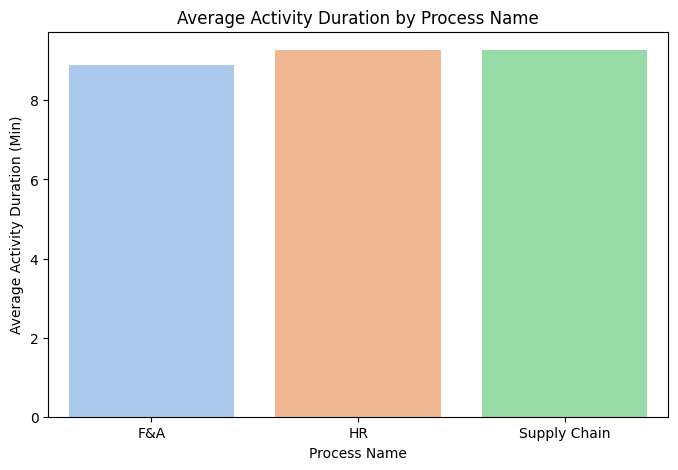

In [82]:
# Visulaization of Bar Plot: Process Name vs Average Activity Duration Min

# Calculate mean Activity Duration minutes per Process Name
process_duration_df = df_cbs_process_analytics.groupby('Process Name')['Activity Duration Min'].mean().reset_index()

# plotting
plt.figure(figsize=(8,5))
sns.barplot(data = process_duration_df, x = 'Process Name', y = 'Activity Duration Min', palette = 'pastel')
plt.title('Average Activity Duration by Process Name')
plt.xlabel('Process Name')
plt.ylabel('Average Activity Duration (Min)')
plt.show()

**Interpretation of Process Name vs Average Activity Duration Min**

**1.** The code first groups the dataset by Process Name (F&A, HR, Supply Chain) and calculates the 
       average Activity Duration Min for each process.

**2.** The computed averages are:
       - F&A: 8.88 minutes  
       - HR: 9.27 minutes  
       - Supply Chain: 9.26 minutes  

**3.** This shows that all three processes have very similar average activity times, 
       with HR being slightly higher and F&A being slightly lower.

**4.** A bar plot is then created using these average values to visually compare 
       how long activities typically take in each process category.

**5.** The bar chart highlights that:
       - HR activities take the longest on average.
       - Supply Chain is very close to HR in duration.
       - F&A activities take the shortest time, but the difference is small.

**6.** The small variation (8.88 to 9.27 minutes) indicates that activity duration 
       is fairly consistent across all three processes.

**7.** Overall, the plot helps identify that there are no major performance gaps between processes,
       as all operate within a similar duration range.


##### Performer Type vs Manual Effort Min

In [83]:
# Calculate the mean manual effort for every Performer Type (Human, Bot, System)
df_cbs_process_analytics.groupby('Performer Type')['Manual Effort Min'].mean()

Performer Type
Bot       0.000000
Human     8.893649
System    0.000000
Name: Manual Effort Min, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_25524\3366916460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performer_effort_df, x ='Performer Type', y ='Manual Effort Min', palette='pastel')


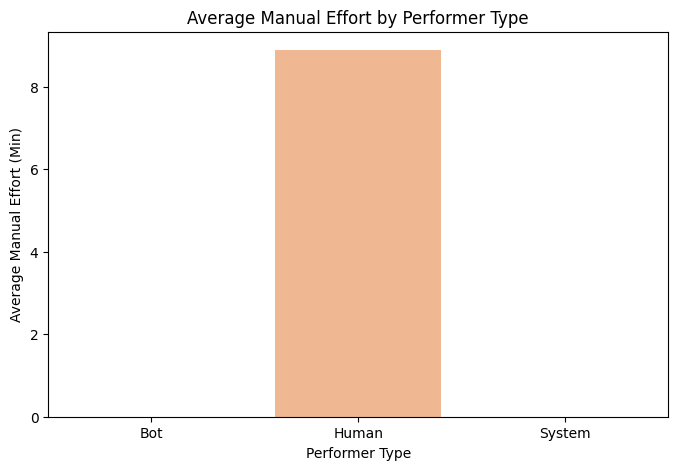

In [84]:
# Visulaization of Bar Plot: Performer Type vs Average Manual Effort Min

# Calculate mean manual effort for each performer type
performer_effort_df = df_cbs_process_analytics.groupby('Performer Type')['Manual Effort Min'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(data=performer_effort_df, x ='Performer Type', y ='Manual Effort Min', palette='pastel')
plt.title('Average Manual Effort by Performer Type')
plt.xlabel('Performer Type')
plt.ylabel('Average Manual Effort (Min)')
plt.show()


**Interpretation of Performer Type vs Manual Effort Min**

**1.** Human performers show an average manual effort of **8.89 minutes**, which means humans are the primary contributors to manual workload in the process.

**2.** Bots have an average manual effort of **0.0 minutes**, confirming that automated bot activities require no human involvement.

**3.** System-triggered activities also show **0.0 minutes** of manual effort, indicating they are fully system-driven without human touchpoints.

**4.** The bar plot clearly highlights the contrast between human and non-human performers:
       - The Human bar is significantly higher.
       - Bot and System bars remain at zero.

**5.** This distribution implies:
       - Manual work is exclusively done by humans.
       - Bots and Systems are successfully handling automated or system-triggered tasks without manual intervention.
       - Any reduction in manual effort must focus on reducing human workload through automation.

**6.** The visualization confirms that Human performers are the only group contributing manual time, making them the primary target for automation opportunities and process optimization.


##### Sub Process vs Activity Duration Min

In [85]:
# Calculate the mean activity duration for every Sub Process category
df_cbs_process_analytics.groupby('Sub Process')['Activity Duration Min'].mean()

Sub Process
AP                   9.690027
AR                   7.992657
Hiring               8.971814
Inventory            9.337748
Leaves               9.385345
Logistics            9.209489
MonthEndClose        9.656474
Onboarding           9.172692
Order Fulfillment    8.907868
Payroll              8.552649
Procurement          9.613879
Name: Activity Duration Min, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_25524\2081364229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subprocess_duration_df, x='Sub Process', y='Activity Duration Min', palette='pastel')


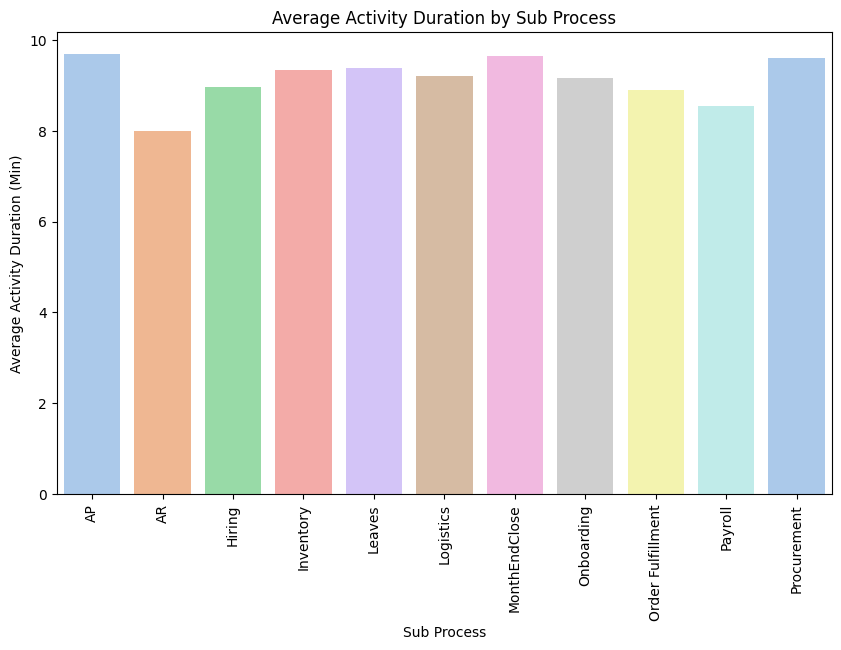

In [86]:
# Visulaization of Bar Plot: Sub Process vs Average Activity Duration Min

# Calculate mean activity duration for each sub process
subprocess_duration_df = df_cbs_process_analytics.groupby('Sub Process')['Activity Duration Min'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=subprocess_duration_df, x='Sub Process', y='Activity Duration Min', palette='pastel')
plt.title('Average Activity Duration by Sub Process')
plt.xlabel('Sub Process')
plt.ylabel('Average Activity Duration (Min)')
plt.xticks(rotation=90)
plt.show()

**Interpretation of Sub Process vs Activity Duration Min**

**1.** AP (Accounts Payable) shows the highest average activity duration at **9.69 minutes**, indicating it is the slowest subprocess and may contain time-consuming steps such as invoice validation or approvals.

**2.** MonthEndClose (9.65 min) and Procurement (9.61 min) also take longer than other subprocesses, suggesting higher workload, more checks, or more complex tasks.

**3.** Inventory (9.33 min), Leaves (9.38 min), and Logistics (9.20 min) fall in the mid-range, reflecting moderate processing times.

**4.** Onboarding (9.17 min) and Order Fulfillment (8.90 min) show slightly lower durations, indicating relatively faster execution.

**5.** Payroll (8.55 min) is one of the faster subprocesses, suggesting simpler or more standardized operations.

**6.** AR (Accounts Receivable) has the lowest duration at **7.99 minutes**, making it the quickest among all subprocesses.

**7.** The bar chart visually shows that:
       - Most subprocesses are tightly clustered between **8 and 10 minutes**.
       - Only small differences exist across subprocesses.
       - AP, MonthEndClose, and Procurement consistently take longer time.

**8.** This distribution implies:
       - No extreme outliers exist; processing times are stable.
       - Subprocess-specific improvements may focus on AP, MonthEndClose, and Procurement to reduce delays.
       - Faster subprocesses like AR and Payroll demonstrate efficient workflows that can be benchmarked.

**9.** Overall, the plot highlights where time is spent across operations and helps identify subprocesses that may benefit most from automation or optimization.


##### Activity Name vs Cost Per Case

In [87]:
# Calculate the mean Cost per case per Activity Name
df_cbs_process_analytics.groupby('Activity Name')['Cost Per Case'].mean()

Activity Name
Approve Invoice          0.717990
Approve Leave            0.681225
Create Purchase Order    0.694408
Post Journal             0.667967
Process Onboarding       0.893475
Process Payment          1.005149
Receive Goods            0.721294
Reconcile Account        0.877523
Resolve Exception        0.740387
Schedule Interview       0.670890
Schedule Shipment        0.975047
Update Inventory         0.711898
Update Payroll           0.676583
Validate Candidate       0.717339
Validate Invoice         0.676935
Name: Cost Per Case, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_25524\4111290871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_cost_df, x='Activity Name', y='Cost Per Case', palette='pastel')


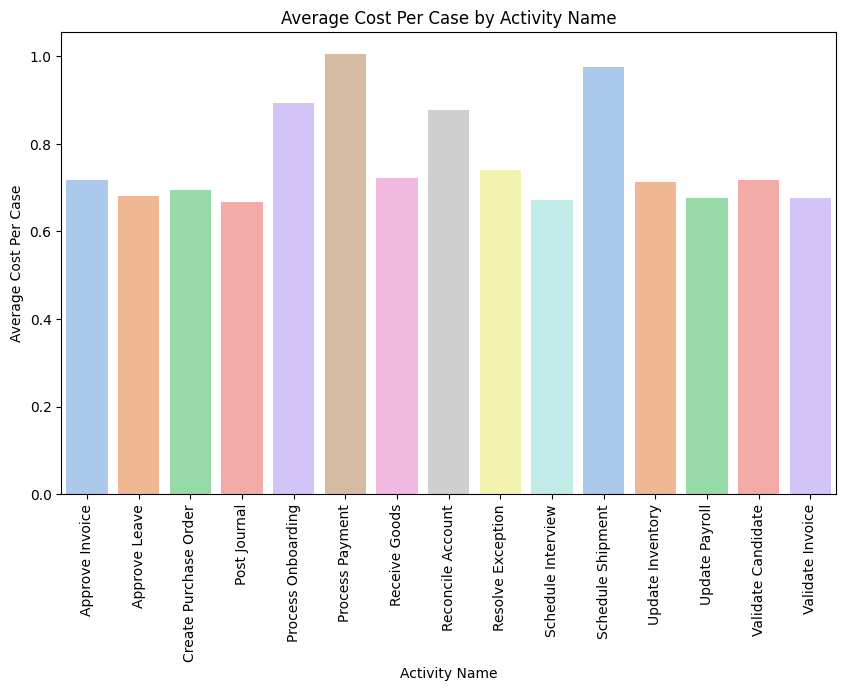

In [88]:
# Visulatization Bar Plot: Activity Name vs Average Cost Per Case

# Calculate mean cost per activity
activity_cost_df = df_cbs_process_analytics.groupby('Activity Name')['Cost Per Case'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=activity_cost_df, x='Activity Name', y='Cost Per Case', palette='pastel')
plt.title('Average Cost Per Case by Activity Name')
plt.xlabel('Activity Name')
plt.ylabel('Average Cost Per Case')
plt.xticks(rotation=90)
plt.show()


**Interpretation of Activity Name vs Cost Per Case**

**1.** Process Payment has the highest average cost at **1.00**, making it the most expensive activity. 
       This indicates that payment processing requires more resources, time, or manual handling compared to other tasks.

**2.** Schedule Shipment also shows a high cost of **0.97**, suggesting that logistics coordination tasks involve higher operational effort.

**3.** Process Onboarding (0.89) and Reconcile Account (0.87) are moderately expensive activities, reflecting more detailed or time-consuming steps.

**4.** Resolve Exception (0.74) and Receive Goods (0.72) fall in the mid-cost range, indicating moderate resource usage.

**5.** Activities like Approve Invoice (0.71), Validate Candidate (0.71), Update Inventory (0.71), and Approve Leave (0.68) are efficiently performed with relatively lower costs.

**6.** The lowest-cost activities are Post Journal (0.66), Schedule Interview (0.67), Update Payroll (0.67), and Validate Invoice (0.67), suggesting these tasks are less resource-intensive.

**7.** The bar plot visually shows a gradual rise from lower-cost activities to higher-cost ones, without extreme spikes or anomalies.

**8.** This distribution implies:
       - Cost differences across activities are consistent and stable.
       - High-cost activities like Process Payment and Schedule Shipment may benefit most from automation or optimization.
       - Lower-cost activities likely involve simpler, standardized steps requiring less manual effort.

**9.** Overall, this analysis highlights which activities drive operational costs and where improvements can have the greatest financial impact.


##### Application Used vs Activity Duration Min

In [89]:
# Calculate the mean Activity Duration Min by Application Used
df_cbs_process_analytics.groupby('Application Used')['Activity Duration Min'].mean()

Application Used
CustomPortal    9.313111
Email           8.656158
Excel           8.585461
Oracle EBS      9.307339
PeopleSoft      9.136101
SAP ECC         9.289168
Workday         9.205031
Name: Activity Duration Min, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_25524\1614002550.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_duration_df, x='Application Used', y='Activity Duration Min', palette='pastel')


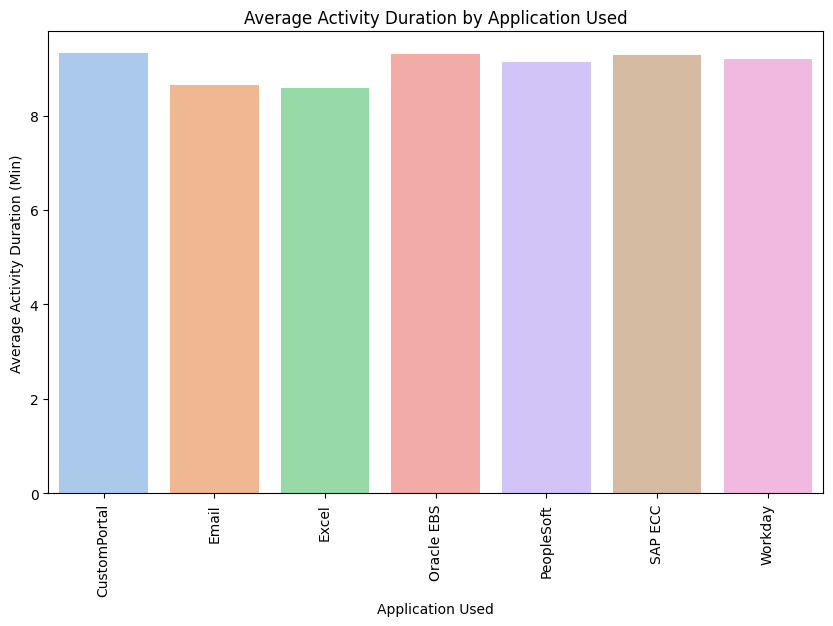

In [90]:
# Visulaization of Bar Plot: Application Used vs Average Activity Duration Min

# Calculate mean activity duration per application
app_duration_df = df_cbs_process_analytics.groupby('Application Used')['Activity Duration Min'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=app_duration_df, x='Application Used', y='Activity Duration Min', palette='pastel')

plt.title('Average Activity Duration by Application Used')
plt.xlabel('Application Used')
plt.ylabel('Average Activity Duration (Min)')
plt.xticks(rotation=90)
plt.show()


**Interpretation of Application Used vs Activity Duration Min**

**1.** CustomPortal has the highest average activity duration at **9.31 minutes**, indicating that tasks performed through this platform typically take longer, possibly due to manual steps or slower UI workflows.

**2.** Oracle EBS (9.30 min) and SAP ECC (9.28 min) also show higher durations, suggesting that ERP-based processes involve more detailed steps or system latency.

**3.** PeopleSoft (9.13 min) and Workday (9.20 min) have slightly lower but still notable durations, reflecting moderate processing complexity within HR and enterprise workflows.

**4.** Email-based tasks have an average duration of **8.65 minutes**, which is lower than ERP systems, likely because email-driven activities involve quick communication or approvals.

**5.** Excel shows the lowest duration at **8.58 minutes**, suggesting spreadsheet-based tasks are relatively faster, possibly due to simpler manual operations or quick data entry.

**6.** The bar plot shows that all applications have durations between **8.5 and 9.4 minutes**, indicating no extreme outliers or drastic differences across systems.

**7.** This distribution implies:
       - ERP systems (Oracle EBS, SAP ECC) and CustomPortal contribute to slightly longer processing times.
       - Lightweight tools like Excel and Email facilitate quicker task execution.
       - Differences across applications are small but meaningful for identifying system performance bottlenecks.

**8.** Overall, the analysis highlights that system choice impacts activity duration, with CustomPortal and ERP platforms taking the longest time, while Excel and Email enable faster task completion.


### Multivariate Analysis

#### Multivariate analysis on Categorical - Categorical- Numerical Columns

##### Process Name vs Performer Type vs Manual Effort Min

In [91]:
# Generate a crosstab showing the minimum manual effort for each 
# combination of Process Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Manual Effort Min'],
    aggfunc = 'min')


Performer Type,Bot,Human,System
Process Name,,,
F&A,0.0,0.5,0.0
HR,0.0,0.5,0.0
Supply Chain,0.0,0.5,0.0


**Interpretation of Process Name vs Performer Type (Minimum Manual Effort)**

**1.** Bots and Systems have a minimum manual effort of **0.0 minutes** across all processes (F&A, HR, Supply Chain).  
       This is expected because automated and system-triggered activities do not require any manual work.

**2.** Human performers show a minimum manual effort of **0.5 minutes** in all processes.  
       This indicates that even in the fastest human-executed tasks, at least a small amount of manual interaction is required.

**3.** The minimum manual effort is:
       - Identical across all Process Names  
       - Identical across all Performer Types (with Human being the only non-zero)  
       - Fully consistent across the dataset

**4.** This uniformity means:
       - Processes allow very quick human actions (e.g., quick approvals, minor updates).
       - No human task is completed instantly—minimum manual time is always > 0.
       - Bots/Systems can perform tasks instantly, but humans cannot.

**5.** Key insights:
       - **Bots and Systems = 0.0 min** (always fully automated, even in minimum case).
       - **Human = 0.5 min** minimum effort in every process (smallest possible manual action).
       - There are no exceptions where a human completes a task in 0.0 minutes.

**6.** Overall:
       - Minimum manual effort values highlight efficiency of automated performers.
       - The lowest human effort is consistent across processes, showing standardized manual actions.
       - Process differences do not affect the minimum effort—only average and maximum values reveal complexity.


In [92]:
# Generate a crosstab showing the maximum manual effort for each 
# combination of Process Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Manual Effort Min'],
    aggfunc = 'max')

Performer Type,Bot,Human,System
Process Name,,,
F&A,0.0,79.47,0.0
HR,0.0,73.47,0.0
Supply Chain,0.0,81.09,0.0


**Interpretation of Process Name vs Performer Type (Maximum Manual Effort)**

**1.** The maximum manual effort for Bots and Systems is **0.0 minutes** across all processes (F&A, HR, Supply Chain).  
       This confirms that Bots and Systems never perform manual tasks — even in the most extreme cases.

**2.** All maximum manual effort values come from Human performers:

       - F&A: **79.47 minutes**
       - HR: **73.47 minutes**
       - Supply Chain: **81.09 minutes**

**3.** This indicates that humans handle the most complex, time-consuming, and exception-heavy cases in every process.

**4.** Supply Chain has the highest maximum manual effort (**81.09 min**), showing that it faces the most extreme manual workload during some activities.

**5.** F&A also shows high manual effort (**79.47 min**), indicating long-running manual tasks are common during finance operations (e.g., reconciliation, journal posting, invoice issues).

**6.** HR shows slightly lower but still very high maximum manual effort (**73.47 min**), reflecting operational complexity in onboarding, interview scheduling, and payroll corrections.

**7.** Key insights:

       - Maximum manual effort is exclusively human-driven.
       - High manual effort indicates complex exceptions, delays, or multistep validations.
       - Automation cannot handle extreme cases—humans step in for resolution.

**8.** The large difference between Human vs Bot/System (0 vs 70–80 minutes) highlights:

       - Why humans remain essential in exception management.
       - Which processes face the most complex workloads (Supply Chain > F&A > HR).

**9.** Overall:

       - This table reveals the worst-case manual effort scenarios.
       - These outliers indicate where automation or process improvement could reduce extreme human workloads.


In [93]:
# Generate a crosstab showing the average manual effort for each 
# combination of Process Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Manual Effort Min'],
    aggfunc = 'mean')

Performer Type,Bot,Human,System
Process Name,,,
F&A,0.0,8.626999,0.0
HR,0.0,9.060460,0.0
Supply Chain,0.0,9.225353,0.0


**Interpretation of Process Name vs Performer Type (Average Manual Effort)**

**1.** Manual effort is **0.0 minutes** for Bots and Systems across all process categories (F&A, HR, Supply Chain).  
       This confirms that Bots and System performers do not perform manual work — all their tasks are automated or system-driven.

**2.** Only Human performers have non-zero manual effort values:

       - F&A: **8.63 minutes**
       - HR: **9.06 minutes**
       - Supply Chain: **9.23 minutes**

**3.** This indicates that:
       - Manual workload is entirely concentrated on human performers.
       - Automation (bots/systems) contributes no manual time at all, as expected.

**4.** Among humans:

       - Supply Chain shows the highest manual effort (**9.23 min**), indicating more manual, exception-heavy, or complex tasks.
       - HR follows closely (**9.06 min**), showing moderate manual involvement.
       - F&A has the lowest manual effort (**8.63 min**) among the three processes.

**5.** The differences between processes for humans are small but meaningful — Supply Chain requires slightly more manual effort compared to HR and F&A.

**6.** Key insights:

       - Bots and Systems are fully efficient in terms of manual effort (always zero).
       - Human involvement drives manual workload in all processes.
       - Supply Chain is the most manual-intensive process, while F&A is the least.

**7.** Overall:

       - Manual effort is exclusively a human-driven metric.
       - Automation is consistent and performing as expected with no manual intervention.
       - Human manual work varies slightly across processes, indicating differing complexity levels.


##### Activity Name vs Performer Type vs Cost Per Case

In [94]:
# Generate a crosstab showing the Average Cost Per Case for each 
# combination of Activity Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Activity Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Cost Per Case'],
    aggfunc = 'min')


Performer Type,Bot,Human,System
Activity Name,,,
Approve Invoice,0.5,0.5,0.5
Approve Leave,0.5,0.5,0.5
Create Purchase Order,0.5,0.5,0.5
Post Journal,0.5,0.5,0.5
Process Onboarding,0.5,0.5,0.5
Process Payment,0.5,0.5,0.5
Receive Goods,0.5,0.5,0.5
Reconcile Account,0.5,0.5,0.5
Resolve Exception,0.5,0.5,0.5


**Interpretation of Activity Name vs Performer Type (Minimum Cost Per Case)**

**1.** The minimum cost per case is **0.5** for every Activity Name across all Performer Types (Bot, Human, and System).

**2.** This absolute uniformity means:

       - Every activity has at least one instance that costs the minimum possible amount (0.5).
       - There are no activities where the lowest cost is higher than 0.5.

**3.** This consistency across Bots, Humans, and Systems suggests:

       - The base cost structure is standardized.
       - All performer types have at least some highly efficient executions.
       - Minimum cost is not influenced by performer type or activity complexity.

**4.** Even for complicated activities like:

       - Process Payment  
       - Process Onboarding  
       - Schedule Shipment  
       - Reconcile Account  
     the lowest cost observed is still 0.5, indicating that best-case scenarios are extremely efficient.

**5.** This may occur due to:

       - System-driven fast executions
       - Automated rule-based steps that complete quickly and cheaply
       - Simplest-case transactions with no exceptions or manual work

**6.** The minimum cost values do not reveal performance issues; instead, they show the **baseline efficiency level** across the entire process landscape.

**7.** Key takeaway:

       - Maximum and average costs show the real complexity.
       - Minimum cost only confirms that fast and inexpensive cases exist across all tasks and performers.
       - Optimization efforts should focus on reducing the high and medium-cost cases, not the minimum ones.

**8.** Overall:

       - Minimum costs are identical everywhere.
       - They represent ideal workflow performance with no delays or complications.


In [95]:
# Generate a crosstab showing the Average Cost Per Case for each 
# combination of Activity Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Activity Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Cost Per Case'],
    aggfunc = 'max')


Performer Type,Bot,Human,System
Activity Name,,,
Approve Invoice,2.93,3.94,1.65
Approve Leave,2.99,2.63,3.74
Create Purchase Order,2.20,2.63,3.47
Post Journal,2.90,3.06,1.42
Process Onboarding,6.83,7.30,2.09
Process Payment,5.99,6.29,2.45
Receive Goods,2.55,3.16,4.06
Reconcile Account,4.75,5.33,6.57
Resolve Exception,2.88,4.02,2.54


**Interpretation of Activity Name vs Performer Type (Maximum Cost Per Case)**

**1.** This table shows the maximum (highest) cost per case for each Activity Name across Bots, Humans, and Systems.  
     These values represent the most expensive instances, typically caused by exceptions, delays, or complex cases.

**2.** Human performers show the highest maximum cost in many activities:

       - Approve Invoice: **3.94**
       - Resolve Exception: **4.02**
       - Update Inventory: **4.03**
       - Validate Candidate: **4.31**
       - Update Payroll: **4.53**
       - Reconcile Account: **5.33**
       This indicates humans handle the most expensive exception-driven cases because they step in when automation fails.

**3.** Bots show extremely high maximum costs in several activities:

       - Schedule Shipment: **7.16** (highest Bot value)
       - Process Onboarding: **6.83**
       - Process Payment: **5.99**
       - Approve Leave: **2.99**
       Bots may require multiple system checks or long-running workflows for complex cases, causing higher costs.

**4.** Systems show very high maximums in backend-heavy activities:

       - Reconcile Account: **6.57**
       - Schedule Shipment: **5.70**
       - Receive Goods: **4.06**
       These indicate heavy system processing, queue delays, or batch jobs.

**5.** Activity-level insights:

       - **Schedule Shipment** has the highest costs overall (Bot: 7.16, Human: 4.61, System: 5.70), making it the most expensive activity across all performers.
       - **Process Onboarding** and **Process Payment** show high maximum costs for all performer types → complex workflows, many validation steps.
       - **Reconcile Account** is cost-heavy across all performers, especially System (**6.57**) and Human (**5.33**).

**6.** Some system-driven tasks are extremely inexpensive at maximum:

       - Validate Invoice (0.70)
       - Schedule Interview (1.19)
       - Update Inventory (1.20)
       This shows systems are very efficient in structured tasks.

**7.** Patterns show:

       - Humans take the most expensive cases when judgment or exception handling is required.
       - Bots incur high costs when automation faces long workflows or many checks.
       - Systems fluctuate: efficient for structured tasks, expensive for backend-intensive ones.

**8.** Process Onboarding, Process Payment, Schedule Shipment, and Reconcile Account are the highest-cost activities across all performers — prime candidates for optimization.

**9.** Overall:

       - Maximum costs highlight the worst-case scenarios for each activity.
       - They reveal where operational risks, exception handling, and workflow complexity lead to expensive cases.
       - This helps identify activities that need redesign, automation tuning, or process improvement.


In [96]:
# Generate a crosstab showing the Average Cost Per Case for each 
# combination of Activity Name and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Activity Name'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Cost Per Case'],
    aggfunc = 'mean')

Performer Type,Bot,Human,System
Activity Name,,,
Approve Invoice,0.788765,0.700643,0.685556
Approve Leave,0.727500,0.651096,0.872632
Create Purchase Order,0.726667,0.677570,0.752593
Post Journal,0.679836,0.662615,0.707500
Process Onboarding,1.053333,0.882963,0.661111
Process Payment,1.107719,0.995455,0.764667
Receive Goods,0.677671,0.701000,1.019630
Reconcile Account,0.842642,0.836280,1.311786
Resolve Exception,0.658438,0.755735,0.781538


**Interpretation of Activity Name vs Performer Type (Average Cost Per Case)**

**1.** The table compares how the cost per case varies across Bots, Humans, and Systems for every Activity Name.  
     This helps identify which performer type is cost-efficient or cost-intensive for each activity.

**2.** Bots generally show higher costs in several activities:

       - Process Payment: **1.1077**
       - Schedule Shipment: **1.1918**
       - Process Onboarding: **1.0533**
       - Approve Invoice: **0.7887**
     This suggests that automated workflows for these activities involve more system processing or longer execution steps.

**3.** Human performers show moderate and stable cost values across most activities:

       - Approve Invoice: **0.7006**
       - Resolve Exception: **0.7557**
       - Schedule Shipment: **0.9157**
     This indicates humans are cost-efficient for many tasks, especially those requiring judgment or validation.

**4.** System performers show very high costs in specific activities:

       - Reconcile Account: **1.3117** (highest overall)
       - Receive Goods: **1.0196**
       - Update Payroll: **0.9015**
       These activities may involve heavy backend processing, multiple system checks, or complex workflow automation.

**5.** Low-cost System activities include:

       - Validate Invoice: **0.5428**
       - Update Inventory: **0.5790**
       - Schedule Interview: **0.6118**
     This indicates high efficiency for system-driven tasks that are structured and repetitive.

**6.** Activity-level insights:

       - **Schedule Shipment** is expensive across all performers (Bot: 1.19, Human: 0.91, System: 1.10)
       - **Process Payment** is consistently high-cost (Bot: 1.10, Human: 1.00, System: 0.76)
       - **Reconcile Account** has extremely high System cost, indicating complex reconciliation logic.

**7.** Human performers are not always the most expensive—Systems and Bots often incur higher costs depending on workflow complexity.

**8.** This pattern shows:

       - Cost varies depending on performer type efficiency and system complexity.
       - Bots do not always reduce cost—sometimes automated paths are more expensive.
       - Systems can have both extremely low and extremely high costs depending on the activity.

**9.** Overall:

       - Activities differ widely in cost across performer types.
       - System-driven activities show the biggest variability.
       - Human performers remain stable and cost-effective in many processes.
       - High-cost activities (e.g., Payment, Shipment, Reconciliation) are important candidates for optimization.


##### Sub Process vs Performer Type vs Activity Duration Min

In [97]:
# Generate a crosstab showing the Minimum Activity Duration for each 
# combination of Sub Process and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Sub Process'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'min')

Performer Type,Bot,Human,System
Sub Process,,,
AP,0.5,0.5,0.50
AR,0.5,0.5,0.50
Hiring,0.5,0.5,0.50
Inventory,0.5,0.5,0.50
Leaves,0.5,0.5,1.32
Logistics,0.5,0.5,0.50
MonthEndClose,0.5,0.5,0.50
Onboarding,0.5,0.5,0.80
Order Fulfillment,0.5,0.5,0.50


**Interpretation of Sub Process vs Performer Type (Minimum Activity Duration)**

**1.** For most subprocesses, the minimum activity duration is **0.5 minutes** across all performer types (Bot, Human, System).  
       This indicates that nearly every subprocess has at least one task completed extremely quickly.

**2.** This uniform minimum value suggests:
       - Some tasks are simple or require minimal processing.
       - Many tasks likely involve automated or system-driven actions that complete instantly.
       - Even human tasks include very quick entries or approvals.

**3.** Only two subprocesses show slightly higher minimum values for System performers:
       - **Leaves → 1.32 min**
       - **Onboarding → 0.80 min**
       - **Procurement → 0.80 min**
     This indicates system-triggered tasks in these subprocesses have a slightly longer minimum execution time compared to others.

**4.** In every subprocess, Human and Bot performers show **0.5 min** minimum duration:
       - Human performers have very fast execution cases, likely simple validations.
       - Bot performers complete automated tasks extremely quickly.

**5.** This pattern reflects:
       - A consistently fast baseline processing time across all subprocesses.
       - No subprocess has a minimum duration above 1.32 minutes.
       - Only a few system tasks require slightly longer initialization or processing.

**6.** Key insights:
       - Minimum durations do not highlight performance issues; they show best-case execution.
       - The true differences in subprocess performance appear in average and maximum durations.
       - Minimum values reinforce that quick tasks are possible across all subprocesses, especially with human or bot performers.

**7.** Overall:
       - Minimum processing time across subprocesses is very stable.
       - Exceptions only appear in System tasks for Leaves, Onboarding, and Procurement.
       - Subprocess performance challenges lie in long-duration cases, not in quick executions.


In [98]:
# Generate a crosstab showing the Maximum Activity Duration for each 
# combination of Sub Process and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Sub Process'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'max')

Performer Type,Bot,Human,System
Sub Process,,,
AP,71.859771,79.465165,34.910000
AR,74.274166,63.155668,55.628138
Hiring,58.384551,66.912250,48.350000
Inventory,59.850894,61.790000,65.811394
Leaves,65.380000,73.466945,22.310000
Logistics,50.287666,75.366590,43.120000
MonthEndClose,59.317730,62.852962,43.733928
Onboarding,35.991936,73.165909,41.261131
Order Fulfillment,60.219213,81.092468,37.260000


**Interpretation of Sub Process vs Performer Type (Maximum Activity Duration)**

**1.** The table shows the *longest* activity duration recorded for each Sub Process across Bot, Human, and System performers.  
     These values represent worst-case or most time-consuming scenarios.

**2.** Human performers have the highest maximum duration in many subprocesses:
       - AP: **79.46 min**
       - Hiring: **66.91 min**
       - Logistics: **75.36 min**
       - Onboarding: **73.16 min**
       - Order Fulfillment: **81.09 min**
       This suggests that human-driven exceptions or complex manual cases lead to long outliers.

**3.** Bots also show very high maximums in some subprocesses:
       - AR: **74.27 min**
       - Leaves: **65.38 min**
       - Payroll: **70.56 min**
       Bots may be involved in long automated workflows or queue-based processing.

**4.** Systems show extreme peaks in certain subprocesses:
       - Payroll: **87.16 min** (highest value in entire table)
       - Inventory: **65.81 min**
       - Procurement: **63.87 min**
       This indicates backend processes with long batch jobs, system waits, or heavy computation.

**5.** Across nearly all subprocesses, maximum durations are:
       - High for Humans → manual exceptions take time
       - Moderate-to-high for Bots → automated flows sometimes wait for system triggers
       - High for Systems in some subprocesses → backend processing can be resource-heavy

**6.** Subprocess-level highlights:
       - **Order Fulfillment** has the highest human maximum (**81.09 min**), showing complexity in logistics coordination.
       - **Payroll** has the highest system maximum (**87.16 min**), indicating long-running automated backend actions.
       - **AP and AR** subprocesses show high maximums across bots and humans, confirming these finance tasks are prone to complex exceptions.

**7.** No subprocess shows uniformly low maximums across all performers, meaning exceptions occur everywhere — finance, HR, supply chain, logistics, and procurement.

**8.** This pattern indicates:
       - Subprocesses have occasional high-complexity cases.
       - Maximum durations represent outliers that heavily impact SLA and TAT.
       - Automation does not always guarantee shorter time; some system tasks run longer due to backend logic.

**9.** Overall, the maximum-duration crosstab highlights:
       - Where the most problematic, time-consuming cases occur.
       - Which performer types generate long delays.
       - Which subprocesses require deep optimization or exception handling improvements.


In [99]:
# Generate a crosstab showing the Average Activity Duration for each 
# combination of Sub Process and Performer Type
pd.crosstab(
    index = df_cbs_process_analytics['Sub Process'],
    columns = df_cbs_process_analytics['Performer Type'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'mean')

Performer Type,Bot,Human,System
Sub Process,,,
AP,11.243616,9.331695,9.075341
AR,7.842512,7.854079,9.707351
Hiring,10.161050,8.355518,11.336860
Inventory,9.376786,8.959178,14.476321
Leaves,9.213191,9.611929,8.050400
Logistics,10.439705,8.946153,9.154444
MonthEndClose,10.409237,9.396360,10.210008
Onboarding,9.773379,9.057434,8.720795
Order Fulfillment,7.569998,9.151806,9.470583


**Interpretation of Sub Process vs Performer Type (Average Activity Duration)**

**1.** Across most subprocesses, Bot, Human, and System show different average activity durations, revealing how performer type influences task execution time.

**2.** Bot-performed activities tend to have **higher average durations** in many subprocesses:

       - AP: 11.24 min
       - Hiring: 10.16 min
       - Logistics: 10.43 min
       - MonthEndClose: 10.40 min
   This may indicate that automated tasks in these subprocesses involve complex workflows or long processing cycles.

**3.** Human performers usually show **moderate activity durations**, often lower than bots:

       - Hiring: 8.35 min
       - Payroll: 8.29 min
       - Order Fulfillment: 9.15 min
       - AP: 9.33 min
   This suggests human-driven tasks are efficient in certain subprocesses despite manual effort.

**4.** System-triggered tasks show mixed behavior:
       - Very high duration in Inventory (**14.47 min**) indicating heavy system load or multiple backend steps.
       - High values in AR (9.70 min), Hiring (11.33 min), and MonthEndClose (10.21 min) show complex automated backend workflows.
       - Lower durations in Leaves (**8.05 min**) and Procurement (8.74 min) indicating more efficient system processes.

**5.** Subprocess-level highlights:
       - **Inventory subprocess** has the highest system duration (14.47 min), suggesting system-heavy workflows.
       - **Hiring** subprocess shows the greatest spread among performers (Bot: 10.16, Human: 8.35, System: 11.33), showing high variability in task execution.
       - **AP subprocess** shows consistently high durations across all performers, indicating AP is a naturally time-consuming subprocess.

**6.** Human performers outperform Bots in several subprocesses:
       - AR: 7.85 (Human) vs 7.84 (Bot) → nearly equal
       - Hiring: 8.35 (Human) vs 10.16 (Bot)
       - Payroll: 8.29 (Human) vs 9.46 (Bot)
       In these subprocesses, human-driven tasks appear more efficient.

**7.** System performers outperform Humans in a few subprocesses:
       - Onboarding: 8.72 (System) vs 9.05 (Human)
       - Leaves: 8.05 (System) vs 9.61 (Human)
       These may be more automation-friendly subprocesses.

**8.** Overall insights:
       - Bots and Systems do not always perform faster; their durations depend on workflow complexity.
       - Some subprocesses (Inventory, Hiring, AP) show consistently high durations across all performer types.
       - Human performers demonstrate better efficiency in several subprocesses, especially hiring and payroll tasks.

**9.** This multivariate view highlights where automation works well, where it is slow, and where human contribution is more efficient.


##### Process Name vs Activity Name vs Activity Duration Min

In [100]:
# Generate a crosstab showing the Minimum Activity Duration for each 
# combination of Process Name and Activity Name
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Activity Name'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'min')

Activity Name,Approve Invoice,Approve Leave,Create Purchase Order,Post Journal,Process Onboarding,Process Payment,Receive Goods,Reconcile Account,Resolve Exception,Schedule Interview,Schedule Shipment,Update Inventory,Update Payroll,Validate Candidate,Validate Invoice
Process Name,,,,,,,,,,,,,,,
F&A,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
HR,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
Supply Chain,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


**Interpretation of Process Name vs Activity Name (Minimum Activity Duration)**

**1.** The minimum activity duration for every activity across all processes (F&A, HR, and Supply Chain) is exactly **0.5 minutes**.

**2.** This consistency means that:
       - Each activity, regardless of process, has at least one instance completed extremely quickly.
       - There is no activity where the shortest observed time is higher than 0.5 minutes.

**3.** The uniform minimum value implies:
       - All activities include very quick cases, likely system-triggered steps, automated actions, or fast approvals.
       - These low durations reflect best-case scenarios where no delays or manual interventions occurred.

**4.** Even complex activities such as:

       - Process Onboarding
       - Process Payment
       - Reconcile Account
       - Schedule Shipment
     still include at least one fast execution at 0.5 minutes.

**5.** This indicates that:
       - The process design allows some tasks to be executed instantly.
       - Automation or system-driven workflows may be responsible for these quick executions.

**6.** This table does not reflect performance issues—it simply shows that every activity has a fast minimum case.

**7.** Overall:
       - Minimum duration is identical across all activities and processes.
       - Only maximum and average durations reveal differences in processing complexity.


In [101]:
# Generate a crosstab showing the Maximum Activity Duration for each 
# combination of Process Name and Activity Name
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Activity Name'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'max')

Activity Name,Approve Invoice,Approve Leave,Create Purchase Order,Post Journal,Process Onboarding,Process Payment,Receive Goods,Reconcile Account,Resolve Exception,Schedule Interview,Schedule Shipment,Update Inventory,Update Payroll,Validate Candidate,Validate Invoice
Process Name,,,,,,,,,,,,,,,
F&A,51.24,46.97,38.76,45.70,79.465165,65.068535,44.49,64.287382,49.03,48.77,74.274166,42.10,46.81,34.91,36.93
HR,40.73,48.35,29.79,38.17,45.643921,58.285286,31.79,87.168981,31.79,39.13,73.165909,25.29,25.99,37.84,65.38
Supply Chain,49.46,27.01,37.26,29.84,81.092468,71.361131,43.12,75.366590,41.38,35.24,65.733408,47.13,34.27,61.79,27.01


**Interpretation of Process Name vs Activity Name (Maximum Activity Duration)**

**1.** The table shows the *maximum* time taken for each activity within F&A, HR, and Supply Chain.  
     These values represent the longest or most complex cases recorded for each activity.

**2.** Process Onboarding has extremely high maximum durations across all processes:
       - F&A: **79.46 min**
       - HR: **45.64 min**
       - Supply Chain: **81.09 min**
     This indicates that onboarding can involve highly time-consuming, exception-heavy cases.

**3.** Reconcile Account has the highest peak in HR (**87.16 min**) and very high values in F&A (64.28) and Supply Chain (75.36).  
     This shows that reconciliation activities can become highly complex depending on data quality or discrepancies.

**4.** Process Payment shows consistently high spikes:
       - F&A: **65.06 min**
       - HR: **58.28 min**
       - Supply Chain: **71.36 min**
     This indicates payment processing may involve heavy validation or exception cases.

**5.** Schedule Shipment also shows large maxima:
       - F&A: **74.27 min**
       - HR: **73.16 min**
       - Supply Chain: **65.73 min**
     This suggests shipment scheduling is prone to delays across all processes.

**6.** Validate Invoice, Validate Candidate, and Approve Leave show lower maximum durations (25–48 min), indicating fewer extreme cases.

**7.** HR has the single highest value in the entire table:
       - **Reconcile Account → 87.16 min**
     This may indicate specific complex exceptions or regional approval challenges.

**8.** F&A shows the highest overall consistency in high maximum durations across different activities, meaning it has more frequent outlier cases.

**9.** Supply Chain also shows several high peaks (Onboarding, Payment, Reconcile, Shipment), indicating variability in operational efficiency.

**10.** Overall, the maximum values reveal:
       - Which activities occasionally take extremely long.
       - Where the biggest outliers and exceptions occur.
       - That Process Payment, Process Onboarding, Reconcile Account, and Schedule Shipment are the most delay-prone tasks across all processes.

These insights help identify where performance-breaking exceptions occur and which activities need deeper optimization or automation.


In [102]:
# Generate a crosstab showing the Average Activity Duration for each 
# combination of Process Name and Activity Name
pd.crosstab(
    index = df_cbs_process_analytics['Process Name'],
    columns = df_cbs_process_analytics['Activity Name'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'mean')

Activity Name,Approve Invoice,Approve Leave,Create Purchase Order,Post Journal,Process Onboarding,Process Payment,Receive Goods,Reconcile Account,Resolve Exception,Schedule Interview,Schedule Shipment,Update Inventory,Update Payroll,Validate Candidate,Validate Invoice
Process Name,,,,,,,,,,,,,,,
F&A,8.039265,7.559286,8.491529,7.676141,11.577415,12.307505,9.017423,11.161566,7.968235,7.940692,11.470622,7.296098,7.356593,7.174167,7.915000
HR,8.934722,9.302143,7.836000,7.939104,9.725046,13.154606,7.241884,10.984308,7.801159,6.500299,16.704954,7.634815,6.531774,9.663676,8.501167
Supply Chain,8.840982,6.583205,7.410000,7.147434,13.183137,12.899846,9.053611,11.810005,8.346509,7.970631,13.447194,8.180000,8.325679,8.829903,8.135673


**Interpretation of Process Name vs Activity Name (Average Activity Duration)**

**1.** The table shows the average time each activity takes across the three major processes: F&A, HR, and Supply Chain.  
     This helps identify which activities are slow or fast within each process.

**2.** Process Onboarding takes significantly longer in F&A (**11.57 min**) and Supply Chain (**13.18 min**), while HR shows a similar trend (**9.72 min**), indicating onboarding is a consistently time-intensive activity across all processes.

**3.** Process Payment shows very high duration in all processes:
       - F&A: **12.30 min**
       - HR: **13.15 min**
       - Supply Chain: **12.89 min**
     This activity is one of the most time-consuming across the board.

**4.** Schedule Shipment has the highest duration in HR (**16.70 min**), significantly higher than in F&A (11.47) and Supply Chain (13.44), indicating shipment scheduling is more complex or slower in HR-related workflows.

**5.** Reconcile Account also shows high values across processes:
       - F&A: **11.16 min**
       - HR: **10.98 min**
       - Supply Chain: **11.81 min**
     This suggests reconciliation activities require detailed and time-heavy validation.

**6.** Receive Goods shows moderate duration across processes (7–9 minutes), with F&A and Supply Chain slightly higher than HR.

**7.** Approve Leave and Update Payroll are fastest in F&A and HR (~7.5 min and ~7.3 min), while slightly slower in Supply Chain for related activities.

**8.** Validate Candidate, Approve Invoice, and Validate Invoice show fairly consistent averages across all processes (6–9 minutes), suggesting these tasks have standard workflows with minimal variation.

**9.** Overall Insights:
       - Activities like Process Payment, Process Onboarding, and Schedule Shipment consistently take the longest.
       - HR has the highest peak duration (Schedule Shipment).
       - F&A and Supply Chain show similar patterns for most activities.
       - Most activities fall within an 8–12 minute range across processes.

**10.** This multivariate table highlights which activities cause process delays and where optimization or automation would have the highest impact.


##### Team Name vs Region vs Activity Duration Min

In [103]:
# Generate a crosstab showing the Minimum Activity Duration for each 
# combination of Team Name and Region
pd.crosstab(
    index = df_cbs_process_analytics['Team Name'],
    columns = df_cbs_process_analytics['Region'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'min')

Region,EU,India,US
Team Name,,,
CBS_AP_Team,0.5,0.5,0.5
CBS_AR_Team,0.5,0.5,0.5
CBS_HR_Team,0.5,0.5,0.5
CBS_Payroll_Team,0.5,0.5,0.5
CBS_SC_Team,0.5,0.5,0.5


**Interpretation of Team Name vs Region (Minimum Activity Duration)**

**1.** The minimum activity duration is **0.5 minutes** for every Team Name across all Regions (EU, India, US).

**2.** This means that each team — CBS_AP_Team, CBS_AR_Team, CBS_HR_Team, CBS_Payroll_Team, and CBS_SC_Team — has performed at least one activity that was completed in **0.5 minutes**, regardless of region.

**3.** The uniform values across all regions indicate:
       - Every team has very fast, short-duration tasks.
       - These minimum-duration tasks are consistent across EU, India, and US operations.

**4.** This also suggests that:
       - No region has a lower or higher minimum duration than others.
       - There are no unusually long minimum-time tasks in any region.
       - Short, quick tasks are present universally across all teams and regions.

**5.** Overall, the table shows that the minimum processing time is stable and identical across:
       - All teams
       - All regions
       - All subprocesses they perform

This consistency indicates standardized quick tasks or system-driven steps executed across global teams.


In [104]:
# Generate a crosstab showing the Maximum Activity Duration for each 
# combination of Team Name and Region
pd.crosstab(
    index = df_cbs_process_analytics['Team Name'],
    columns = df_cbs_process_analytics['Region'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'max')

Region,EU,India,US
Team Name,,,
CBS_AP_Team,81.092468,87.168981,67.508544
CBS_AR_Team,65.068535,60.358943,73.165909
CBS_HR_Team,75.366590,64.652266,79.465165
CBS_Payroll_Team,73.466945,64.287382,65.380000
CBS_SC_Team,58.639224,66.912250,70.569940


**Interpretation of Team Name vs Region (Maximum Activity Duration)**

**1.** The maximum activity duration varies significantly across teams and regions, indicating that some tasks take much longer depending on team type and geographical location.

**2.** CBS_AP_Team shows the highest duration in India (**87.16 minutes**), suggesting AP tasks in India can be more complex or time-consuming.

**3.** CBS_AR_Team has its highest duration in the US (**73.16 minutes**), indicating AR tasks in the US region may require additional handling or checks.

**4.** CBS_HR_Team shows the highest duration in the US (**79.46 minutes**), reflecting longer HR-related activities in that region.

**5.** CBS_Payroll_Team’s longest duration is in the EU (**73.46 minutes**), suggesting payroll-related activities may be more time-intensive in European operations.

**6.** CBS_SC_Team has the highest duration in the US (**70.56 minutes**), showing that supply chain tasks may take longer in the US region.

**7.** Key insights:
       - The US region consistently shows high maximum durations for multiple teams.
       - India has the single highest maximum (AP Team → 87.16 minutes).
       - EU also exhibits high durations in Payroll and AP.

**8.** This variation implies:
       - Certain teams face higher complexity or exceptions in specific regions.
       - Regional workflow differences, system delays, or compliance requirements may drive longer durations.

**9.** Overall, maximum activity durations are not uniform, revealing where the slowest or most complex work occurs for each team across regions.


In [105]:
# Generate a crosstab showing the Average Activity Duration for each 
# combination of Team Name and Region
pd.crosstab(
    index = df_cbs_process_analytics['Team Name'],
    columns = df_cbs_process_analytics['Region'],
    values = df_cbs_process_analytics['Activity Duration Min'],
    aggfunc = 'mean')

Region,EU,India,US
Team Name,,,
CBS_AP_Team,9.831375,9.791484,9.451105
CBS_AR_Team,8.751373,9.122429,8.554359
CBS_HR_Team,10.022689,9.358882,8.791336
CBS_Payroll_Team,8.877158,9.010502,7.933115
CBS_SC_Team,8.638157,9.173220,8.766507


**Interpretation of Team Name vs Region (Average Activity Duration)**

**1.** Average activity duration varies across both teams and regions, showing differences in workflow efficiency and process complexity.

**2.** CBS_HR_Team shows the highest average activity duration in the EU (**10.02 minutes**), indicating HR tasks in the EU region take the longest time on average.

**3.** CBS_AP_Team maintains consistently high averages across all regions:
       - EU: 9.83 min
       - India: 9.79 min
       - US: 9.45 min
   This suggests that Accounts Payable tasks are generally time-consuming everywhere.

**4.** CBS_SC_Team has its highest duration in India (**9.17 min**) and lowest in the EU (**8.63 min**), showing moderate variation.

**5.** CBS_AR_Team shows slightly higher duration in India (**9.12 min**) compared to EU (**8.75 min**) and US (**8.55 min**), indicating AR tasks are more time-intensive in India.

**6.** CBS_Payroll_Team is most efficient in the US (**7.93 min**) and slightly slower in India (**9.01 min**), showing regional differences in payroll processing.

**7.** Overall observations:
       - EU and India generally show higher average durations.
       - US has lower average durations for most teams.
       - HR and AP teams have the highest averages, indicating more complex or manual-heavy tasks.

**8.** This distribution implies:
       - Regional variations in process workflows or system performance.
       - Potential for optimization in EU HR processes and India-based AP, AR, and SC activities.
       - US teams may be benefiting from better automation or streamlined processes.

**9.** The average values provide a realistic picture of everyday performance, unlike min/max which show extremes.


#### Multivariate Analysis on Numerical Numerical Numerical features

##### Activity Duration Min vs Manual Effort Min vs Cost Per Case

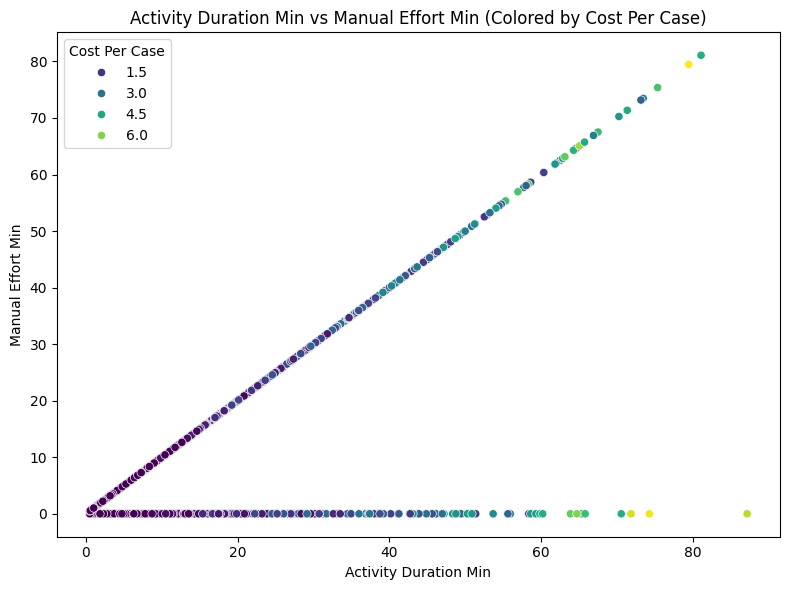

In [107]:
# Scatter plot of Multivariate Analysis:
# Activity Duration Min vs Manual Effort Min with Cost Per Case as hue

plt.figure(figsize=(8,6))

sns.scatterplot(
    data = df_cbs_process_analytics,
    x = 'Activity Duration Min',
    y = 'Manual Effort Min',
    hue = 'Cost Per Case',
    palette = 'viridis'
)

plt.title('Activity Duration Min vs Manual Effort Min (Colored by Cost Per Case)')
plt.xlabel('Activity Duration Min')
plt.ylabel('Manual Effort Min')
plt.legend(title='Cost Per Case')
plt.tight_layout()
plt.show()


**Interpretation: Multivariate Analysis**
**Activity Duration Min vs Manual Effort Min (Colored by Cost Per Case)**

**1.** The scatter plot shows a **very strong positive linear relationship** between  
   **Activity Duration Min** and **Manual Effort Min**.  
   - As activity duration increases, manual effort increases almost proportionally.

**2.** The diagonal line-like pattern indicates that  
   **longer tasks consistently require higher manual effort**,  
   suggesting that both metrics measure similar workload intensity.

**3.** The color (Cost Per Case) adds a third variable to the analysis:  
   - Lighter/yellow points represent **higher cost**,  
   - Darker/blue points represent **lower cost**.  
   This shows that **cost increases as both duration and manual effort increase**.

**4.** High-cost activities are clustered toward the **upper-right corner**  
   (high duration + high manual effort), confirming that  
   **Cost Per Case is strongly driven by both human time and total task duration**.

**5.** There are **no major outliers**, meaning the operational behavior is consistent.  
   The pattern is smooth and stable, with cost scaling naturally with effort and time.

**6.** This plot visually confirms the **strong correlations** found earlier:  
   - Activity Duration Min ↔ Manual Effort Min (0.76)  
   - Activity Duration Min ↔ Cost Per Case (0.87)

**Conclusion**
The multivariate scatter plot shows that  
**tasks that take more time also require more manual effort, and these tasks cost more to execute.**  
This identifies Activity Duration, Manual Effort, and Cost Per Case as the  
**three most critical operational drivers** for workload, cost optimization, and automation targeting.
